In [350]:
import pandas as pd               
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [351]:
df=pd.read_csv('Walmart DataSet.csv')

In [352]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [354]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [355]:
df.shape

(6435, 8)

In [356]:
df.duplicated().sum()

0

In [357]:
num_columns=df.select_dtypes(include=np.number).columns
num_columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [358]:
indices_to_remove = ['Holiday_Flag']
num_columns=num_columns.difference(indices_to_remove)

In [359]:
num_columns

Index(['CPI', 'Fuel_Price', 'Store', 'Temperature', 'Unemployment',
       'Weekly_Sales'],
      dtype='object')

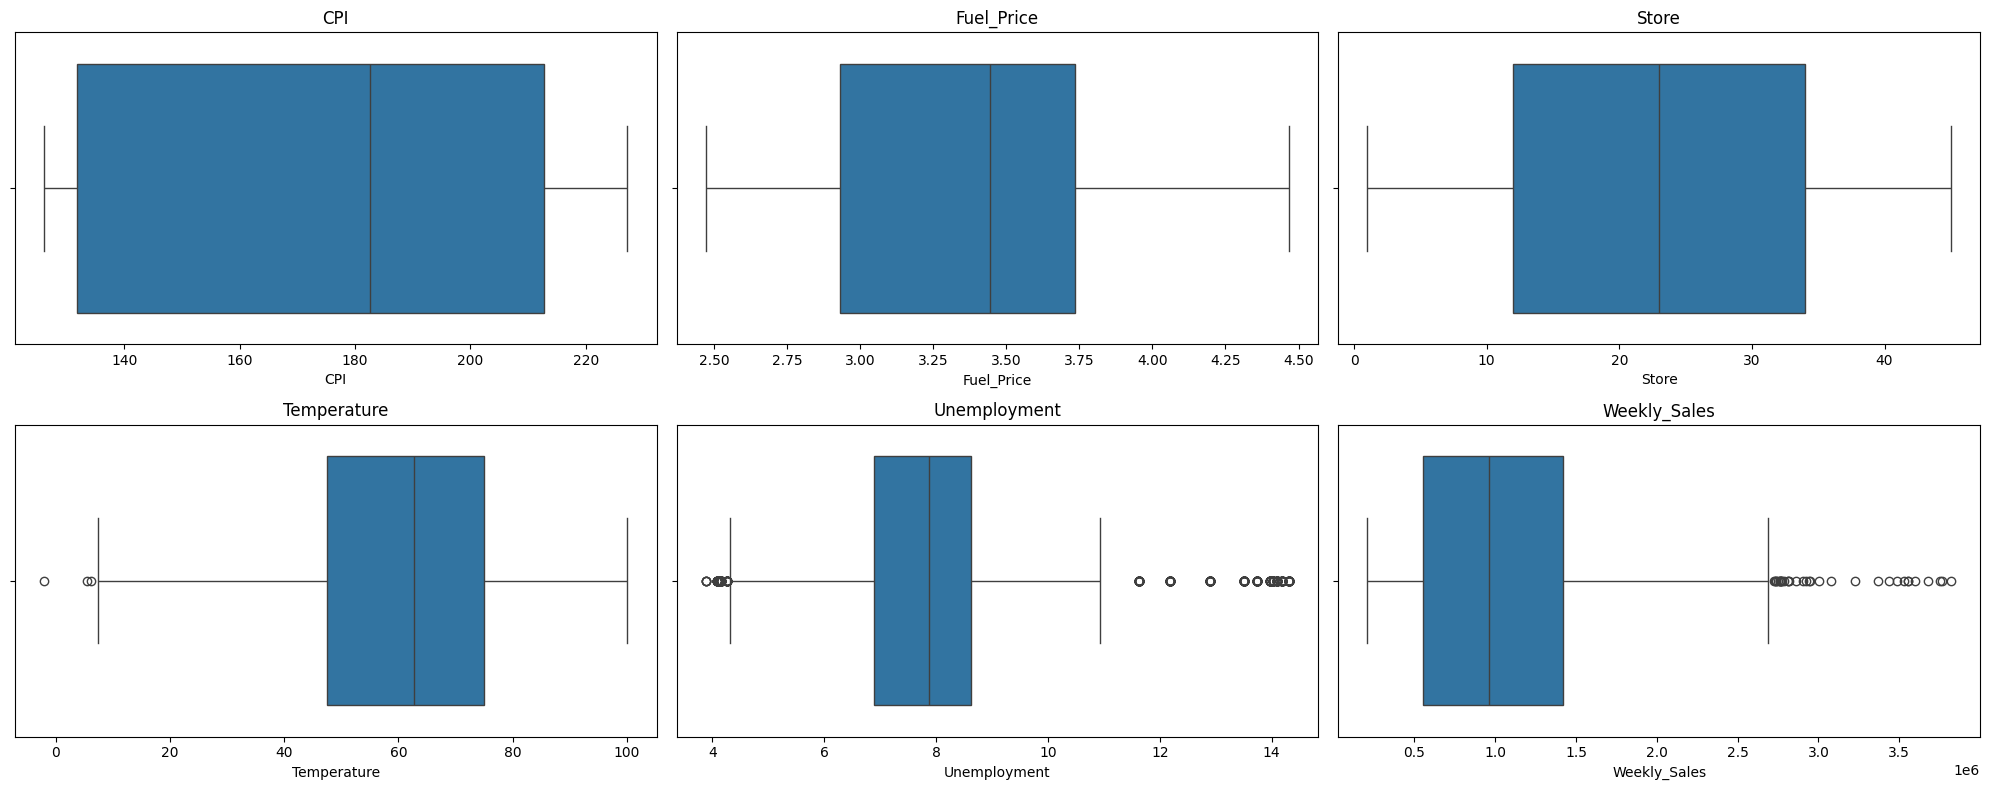

In [360]:
plt.figure(figsize=(20,8))

for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.title(col) 
plt.show()

In [361]:
def remove_outliers(df1,col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75) #
    IQR=q3-q1
    Lower_Band = q1-1.5*IQR
    Upper_Band = q3+1.5*IQR
    df[col]=np.clip(df[col],Lower_Band,Upper_Band)
    return df1 

def treat_outliers(df1,col_list):
    for col in col_list:              
        df1=remove_outliers(df1,col) 
    return df1 

In [362]:
df=treat_outliers(df,num_columns)

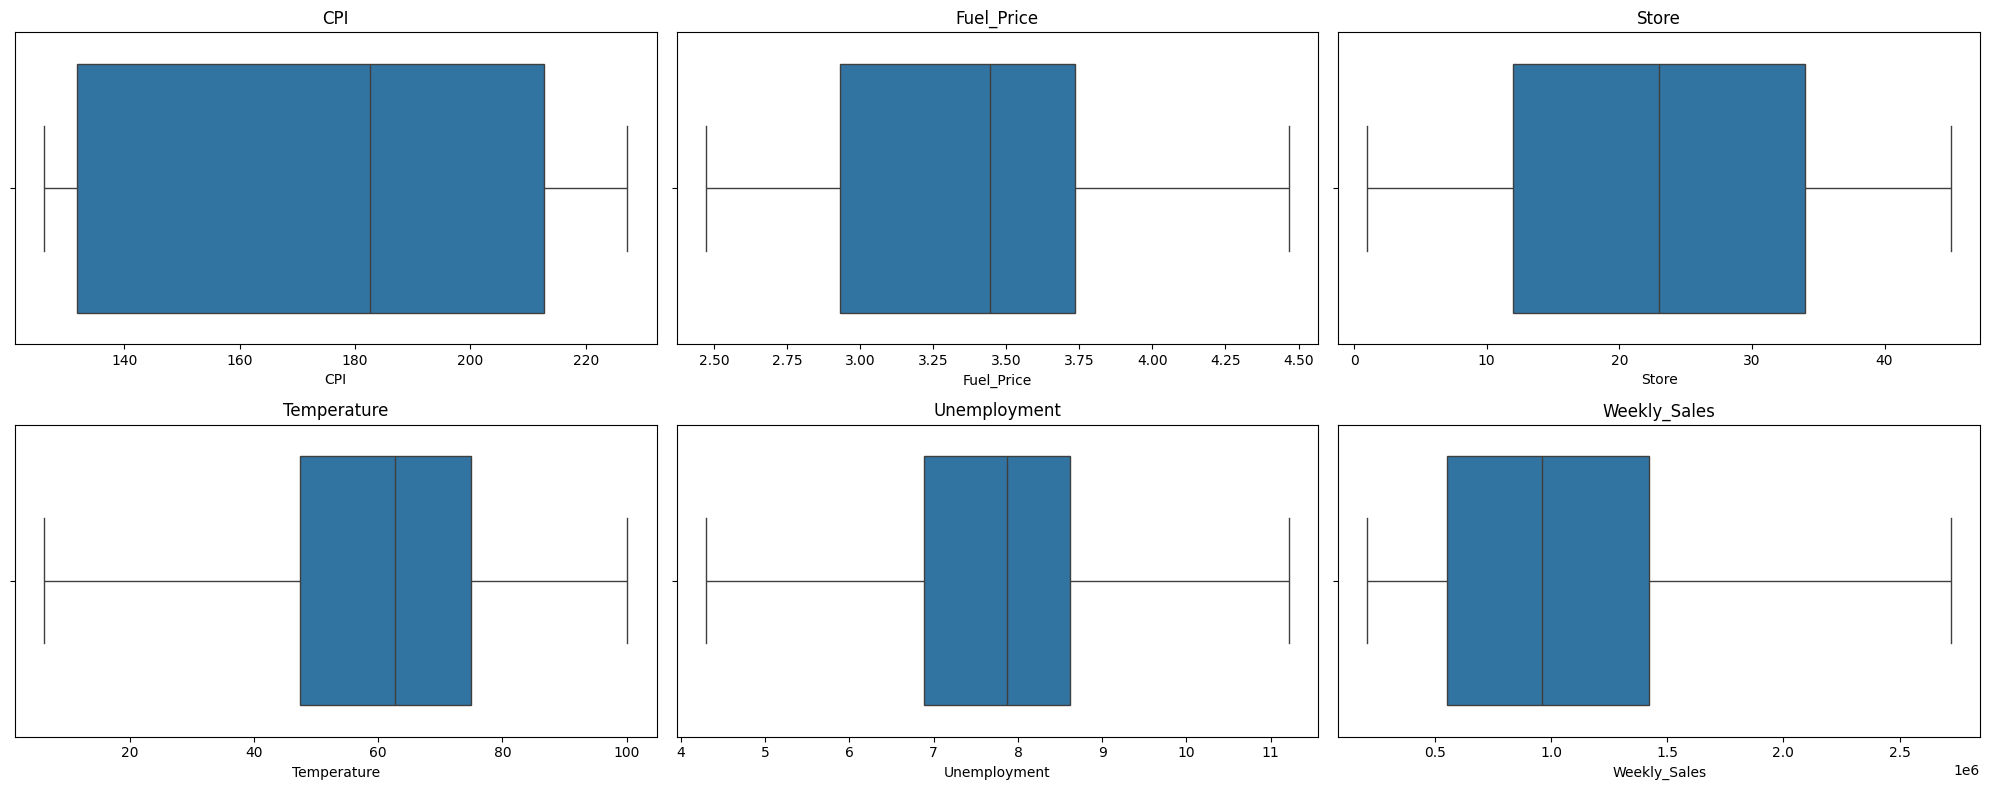

In [363]:
plt.figure(figsize=(20,8))

for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col]) 
    plt.tight_layout() 
    plt.title(col)  
plt.show()

In [364]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [365]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

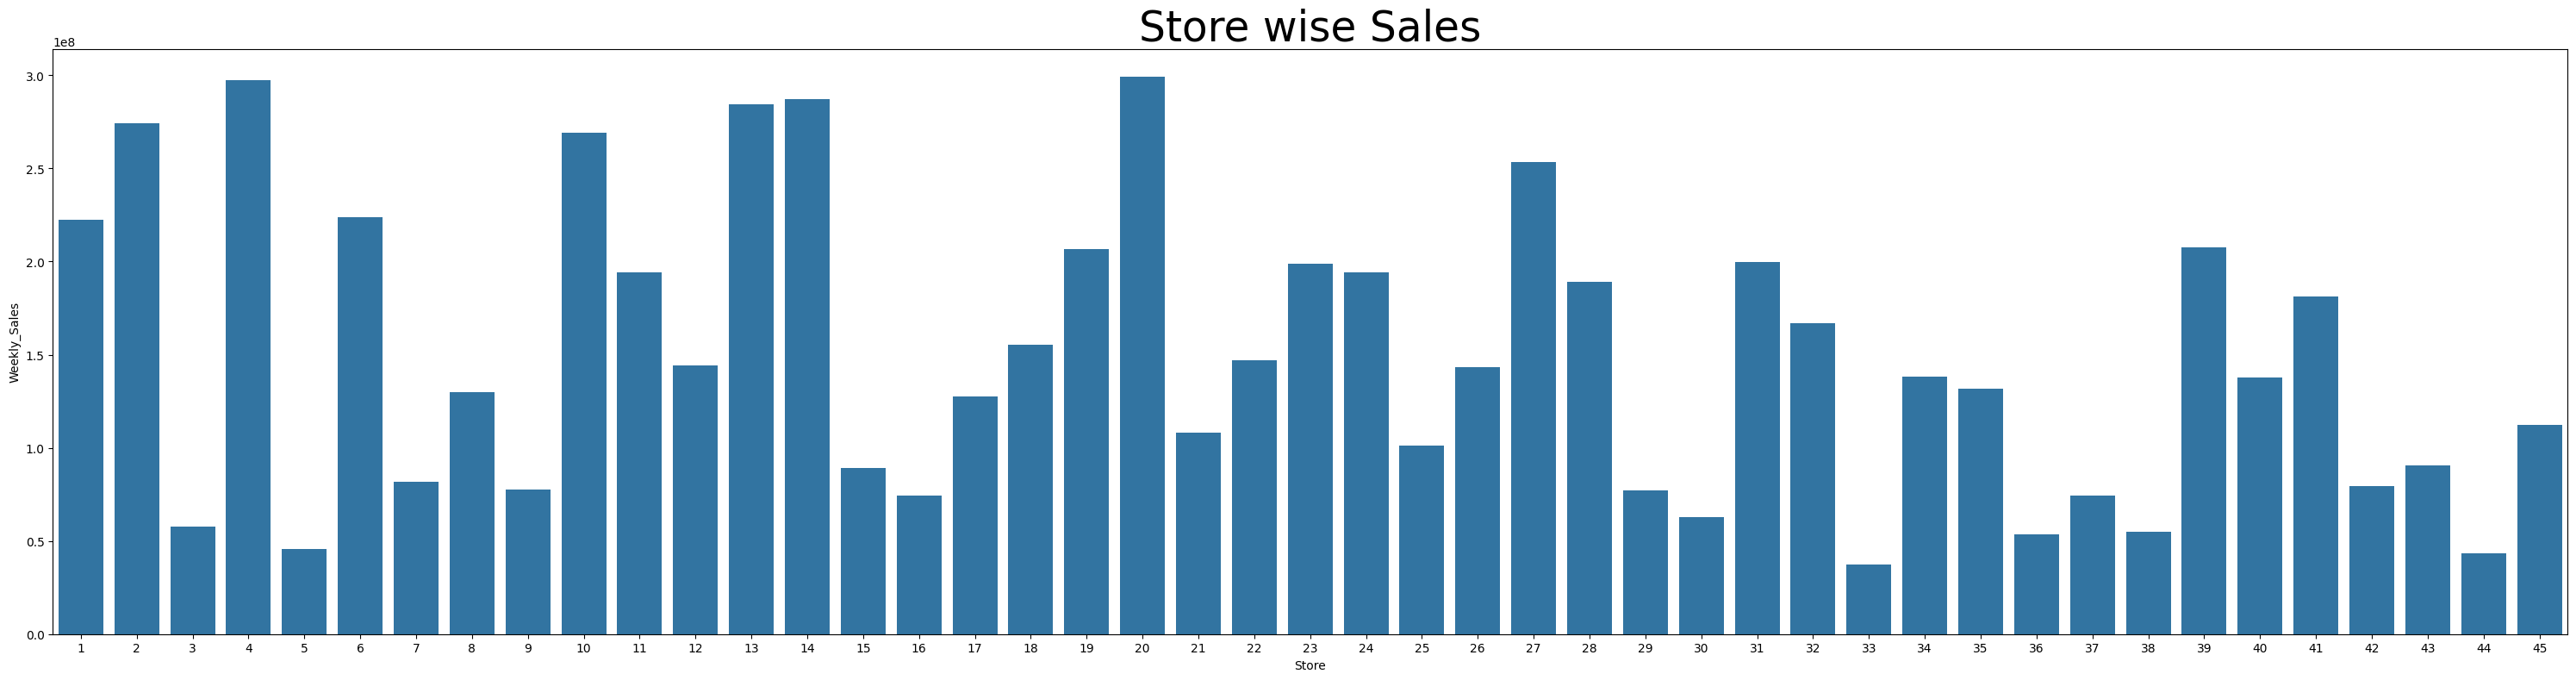

In [366]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales)
plt.title('Store wise Sales',fontsize=35)
plt.tight_layout()
plt.show()

In [367]:
top_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)

In [368]:
top_10_Sale_Store

,Store,Weekly_Sales
19,20,2.990663e+08
3,4,2.973575e+08
13,14,2.870091e+08
12,13,2.845247e+08
1,2,2.741628e+08
9,10,2.692807e+08
26,27,2.534795e+08
5,6,2.237489e+08
0,1,2.224028e+08
38,39,2.074455e+08


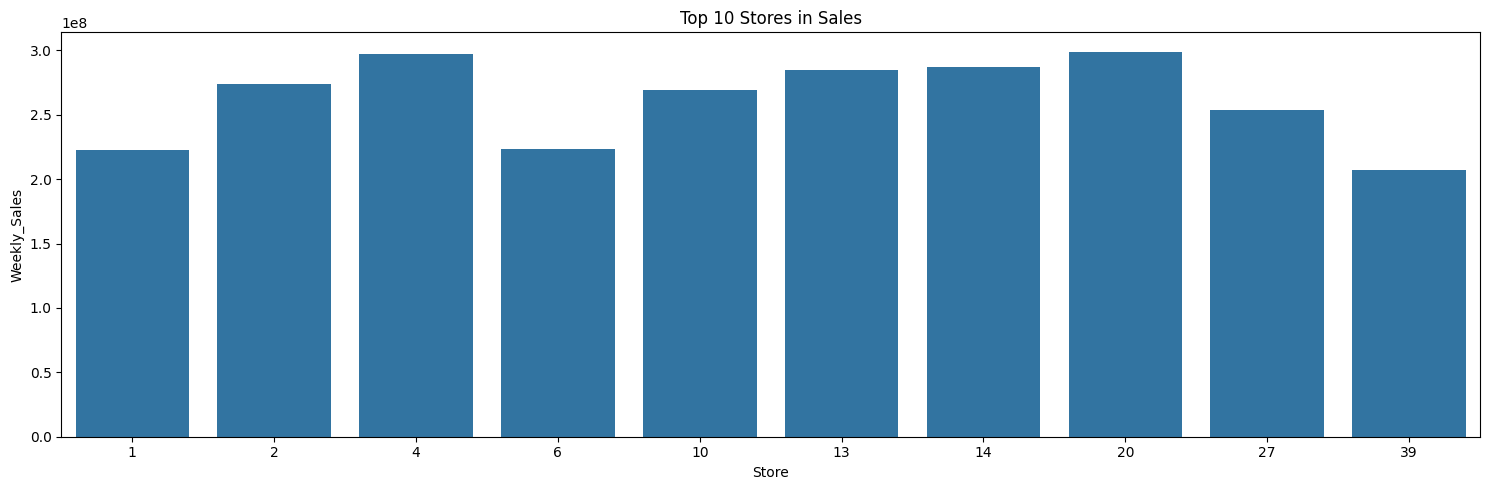

In [369]:

plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store) 
plt.title('Top 10 Stores in Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

In [370]:
Bottom_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store

,Store,Weekly_Sales
32,33,37160221.96
43,44,43293087.84
4,5,45475688.90
35,36,53412214.97
37,38,55159626.42
2,3,57586735.07
29,30,62716885.12
36,37,74202740.32
15,16,74252425.40
28,29,77141554.31


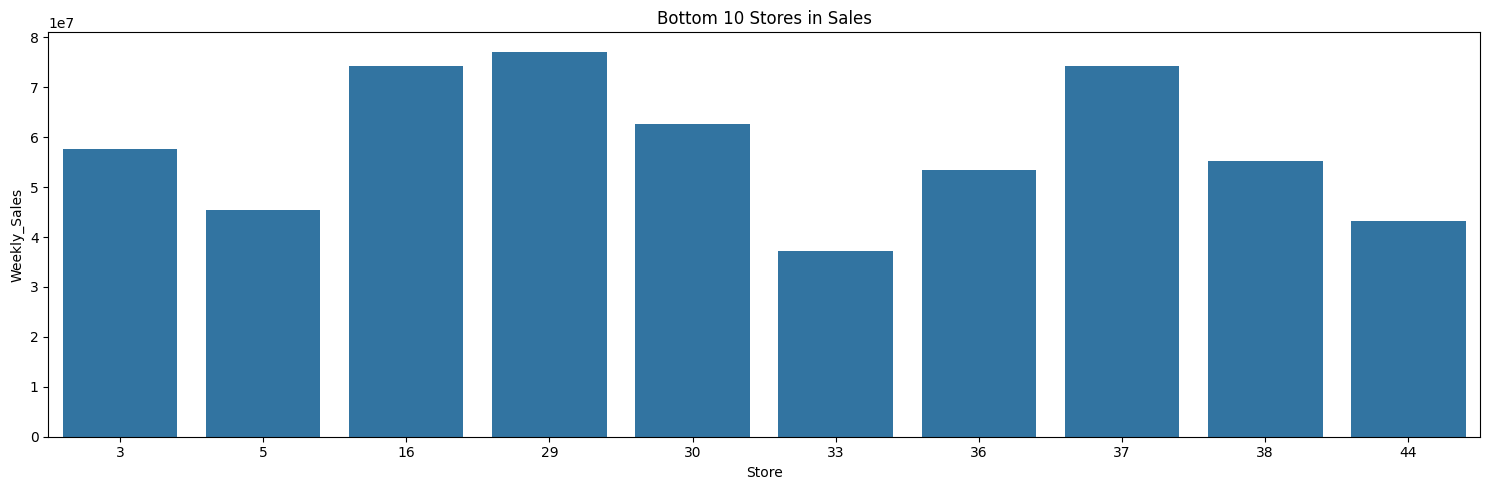

In [371]:
plt.figure(figsize=(15,5)) 
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store)
plt.title('Bottom 10 Stores in Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales') 
plt.tight_layout()
plt.show()

In [372]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [373]:
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True)
df_date_sales.head(5)

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30


In [374]:
df_date_sales.shape

(143, 2)

Text(0, 0.5, 'Sales')

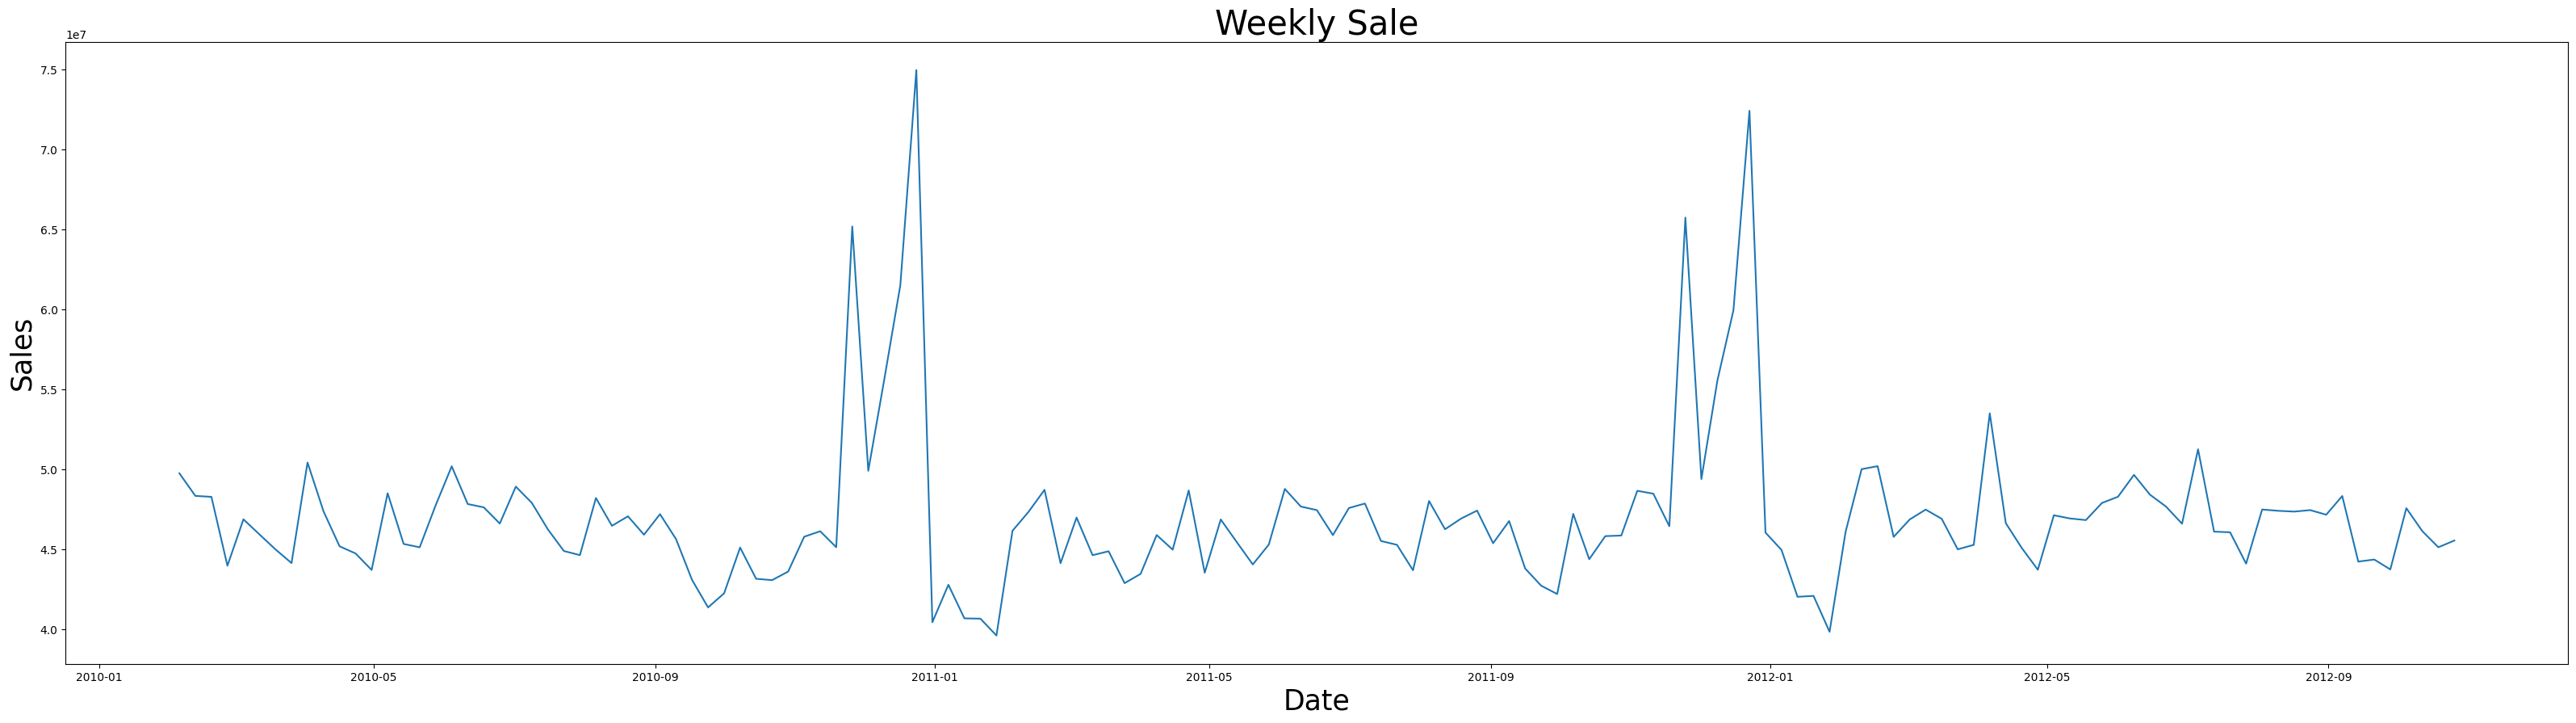

In [375]:
plt.figure(figsize=(40,10))
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales) 
plt.title('Weekly Sale',fontsize=30)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Sales',fontsize=25)

In [376]:
df['Quarters'] = df['Date'].dt.to_period("Q")

In [377]:
df_quarter_sales = df.groupby('Quarters')['Weekly_Sales'].sum().reset_index()

In [378]:
df_quarter_sales

,Quarters,Weekly_Sales
0,2010Q1,3.722528e+08
1,2010Q2,6.103695e+08
2,2010Q3,5.974881e+08
3,2010Q4,7.018634e+08
4,2011Q1,5.293917e+08
5,2011Q2,5.979481e+08
6,2011Q3,6.393585e+08
7,2011Q4,6.759581e+08
8,2012Q1,5.924677e+08
9,2012Q2,6.182977e+08


<Axes: xlabel='Quarters', ylabel='Weekly_Sales'>

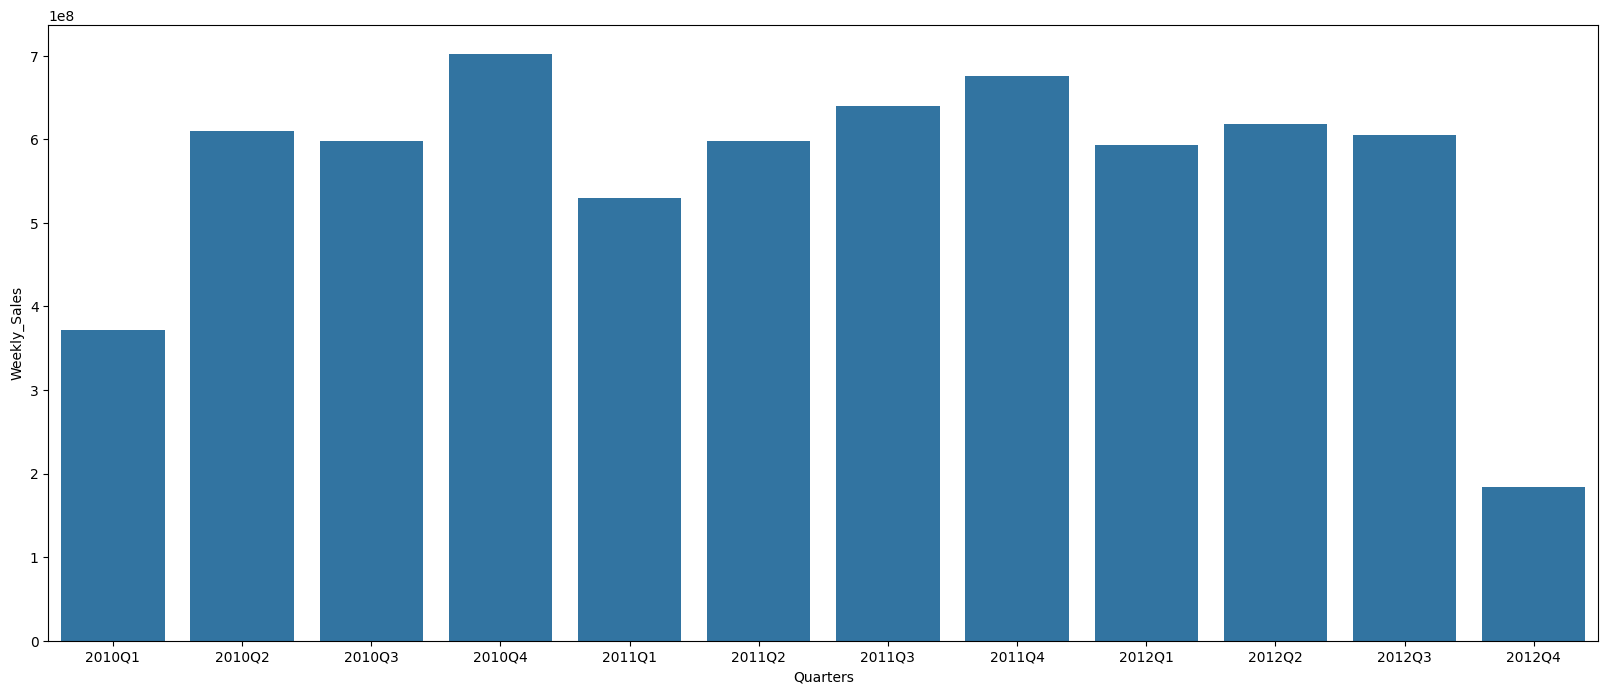

In [379]:
plt.figure(figsize=(20,8))
sns.barplot(x='Quarters',y='Weekly_Sales',data=df_quarter_sales)

In [380]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [381]:
df_Hf_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [382]:
df_Hf_Sales

,Holiday_Flag,Weekly_Sales
0,0,6.220935e+09
1,1,5.038284e+08


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

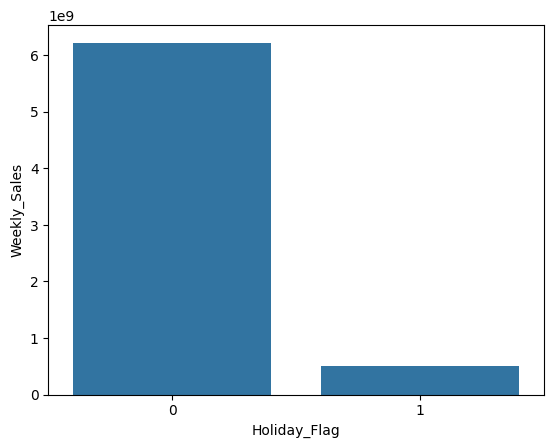

In [383]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_Hf_Sales)

In [384]:
df['Temperature'].min()

6.240000000000002

In [385]:
df['Temperature'].max()

100.14

In [386]:
bins = [0,25,50,75,100]
labels = ['0-25','26-50','51-75','76-100']

In [387]:
df['Temp_Category']= pd.cut(df['Temperature'],bins=bins,labels=labels)

In [388]:
df['Temp_Category'].value_counts()

Temp_Category
51-75     2982
26-50     1631
76-100    1596
0-25       224
Name: count, dtype: int64

In [389]:
df_temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Temp_Category', ylabel='Weekly_Sales'>

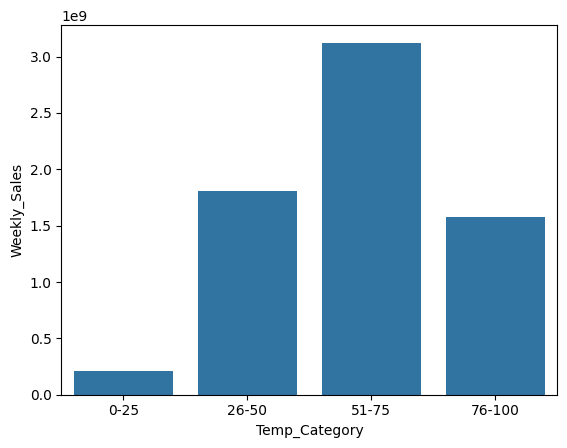

In [390]:
sns.barplot(x='Temp_Category',y='Weekly_Sales',data=df_temp_sales)

In [391]:
df['Fuel_Price'].min()

2.472

In [392]:
df['Fuel_Price'].max()

4.468

In [393]:
bins1 = [2,2.5,3,3.5,4,4.5]
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']

df['Fuel_Price_Cat']= pd.cut(df['Fuel_Price'],bins=bins1,labels=labels1)
df['Fuel_Price_Cat'].value_counts()

df_Fuel_Price_Sales = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()

In [394]:
df_Fuel_Price_Sales

,Fuel_Price_Cat,Weekly_Sales
0,2-2.5,4.702810e+05
1,2.6-3,1.945889e+09
2,3.1-3.5,1.620472e+09
3,3.6-4,2.738130e+09
4,4.1-4.5,4.198009e+08


<Axes: xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

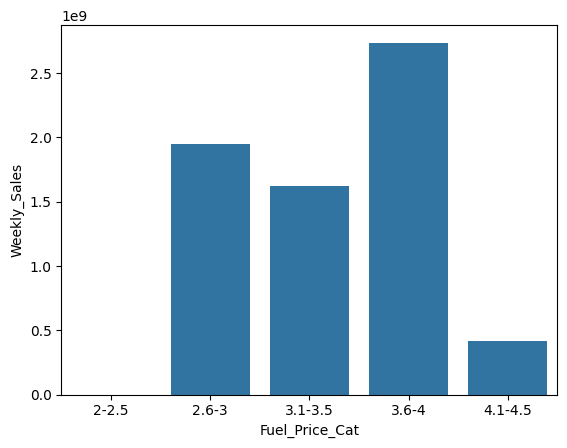

In [395]:
sns.barplot(x='Fuel_Price_Cat',y='Weekly_Sales',data=df_Fuel_Price_Sales)

In [396]:
df['CPI'].min()
df['CPI'].max()
bins2=[125,155,185,215,245]
labels2=['125-155','156-185','186-215','216-245',]
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2)

In [397]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarters,Temp_Category,Fuel_Price_Cat,CPI_cat
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q1,26-50,2.6-3,186-215
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q1,26-50,2.6-3,186-215
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,26-50,2.6-3,186-215
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,26-50,2.6-3,186-215
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q1,26-50,2.6-3,186-215


In [398]:
df['CPI_cat'].value_counts()

CPI_cat
125-155    3146
186-215    2010
216-245    1159
156-185     120
Name: count, dtype: int64

In [399]:
df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index()

In [400]:
df_Cpi_Sales

,CPI_cat,Weekly_Sales
0,125-155,3.400064e+09
1,156-185,1.738193e+08
2,186-215,2.028806e+09
3,216-245,1.122074e+09


<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

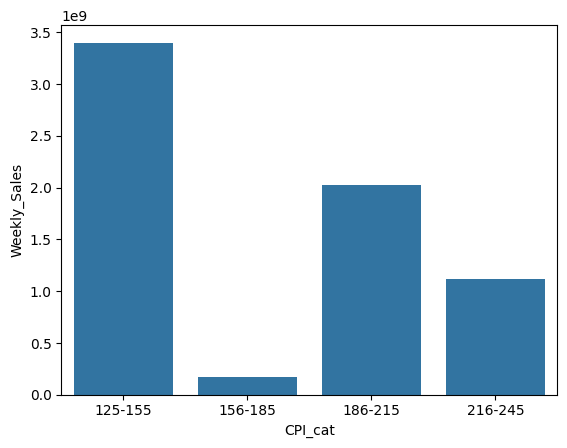

In [401]:
sns.barplot(x='CPI_cat',y='Weekly_Sales',data=df_Cpi_Sales)

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

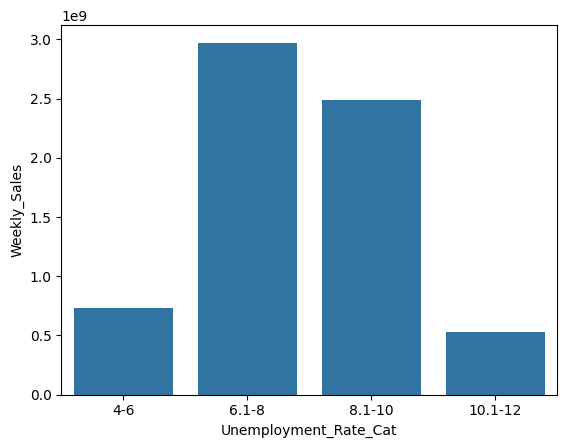

In [402]:
df['Unemployment'].min()
df['Unemployment'].max()
bins3=[4,6,8,10,12] 
labels3=['4-6','6.1-8','8.1-10','10.1-12']
df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins3,labels=labels3)
df['Unemployment_Rate_Cat'].value_counts()
df_Un_Emp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index()
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

In [403]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [404]:
df_Encode = df[['Quarters','Temp_Category','Fuel_Price_Cat','CPI_cat','Unemployment_Rate_Cat']].copy()

In [405]:
df_Encode['Quarters']=Le.fit_transform(df['Quarters'])
df_Encode['Temp_Category']=Le.fit_transform(df['Temp_Category'])
df_Encode['Fuel_Price_Cat']=Le.fit_transform(df['Fuel_Price_Cat'])
df_Encode['CPI_cat']=Le.fit_transform(df['CPI_cat'])
df_Encode['Unemployment_Rate_Cat']=Le.fit_transform(df['Unemployment_Rate_Cat'])
df_Encode['Weekly_Sales']=Le.fit_transform(df['Weekly_Sales'])

In [406]:
corr_df = df_Encode.corr()

<Axes: >

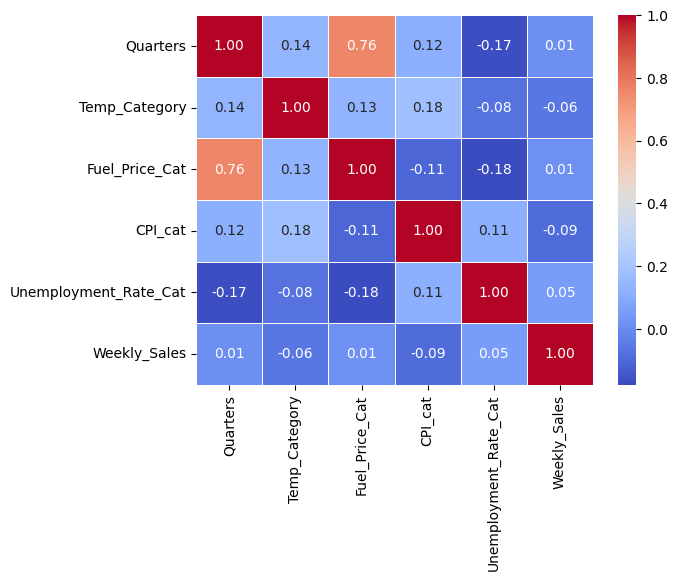

In [407]:
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

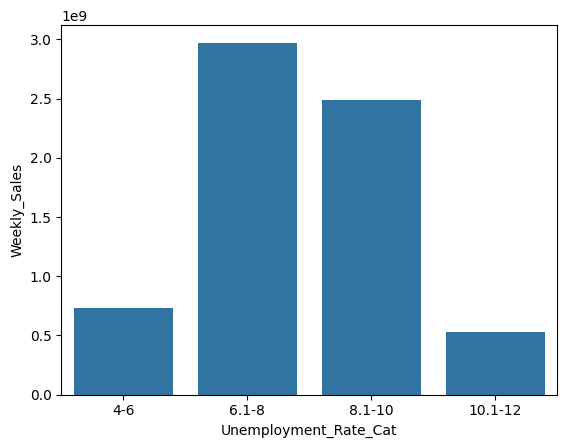

In [408]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Store                  6435 non-null   int64         
 1   Date                   6435 non-null   datetime64[ns]
 2   Weekly_Sales           6435 non-null   float64       
 3   Holiday_Flag           6435 non-null   int64         
 4   Temperature            6435 non-null   float64       
 5   Fuel_Price             6435 non-null   float64       
 6   CPI                    6435 non-null   float64       
 7   Unemployment           6435 non-null   float64       
 8   Quarters               6435 non-null   period[Q-DEC] 
 9   Temp_Category          6433 non-null   category      
 10  Fuel_Price_Cat         6435 non-null   category      
 11  CPI_cat                6435 non-null   category      
 12  Unemployment_Rate_Cat  6435 non-null   category      
dtypes: 

In [410]:
from sklearn.preprocessing import LabelEncoder

In [411]:
label_encoder=LabelEncoder()

In [412]:
df['Unemployment_Rate_Cat'] = label_encoder.fit_transform(df['Unemployment_Rate_Cat'])

In [413]:
df['Unemployment_Rate_Cat'].value_counts()

Unemployment_Rate_Cat
2    2795
3    2389
0     629
1     622
Name: count, dtype: int64

In [414]:
filtered_df = df[df['Unemployment_Rate_Cat'].isin([1, 0])]

In [415]:
sales_unemp_store= filtered_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [416]:
sales_unemp_store

,Store,Weekly_Sales
0,4,1.782381e+08
1,5,1.416884e+07
2,6,4.684711e+07
3,8,3.923392e+07
4,9,2.397403e+07
5,12,1.442872e+08
6,13,6.152466e+07
7,16,2.016068e+06
8,17,1.623276e+07
9,23,1.987367e+08


In [417]:
print('Most Suffered Stores with Unemployment Rate is listed Below : ')
sales_unemp_store.sort_values(by='Weekly_Sales',ascending=True).head()

Most Suffered Stores with Unemployment Rate is listed Below : 


,Store,Weekly_Sales
7,16,2016067.98
12,33,2299155.24
1,5,14168838.13
17,44,14187373.72
8,17,16232762.69


In [418]:
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date',inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)


df_Temperature =df.groupby('Date')['Temperature'].sum().reset_index()
df_Temperature.set_index('Date',inplace=True) 
Temperature_decomposition=seasonal_decompose(df_Temperature['Temperature'],period=13)

Figure(640x480)


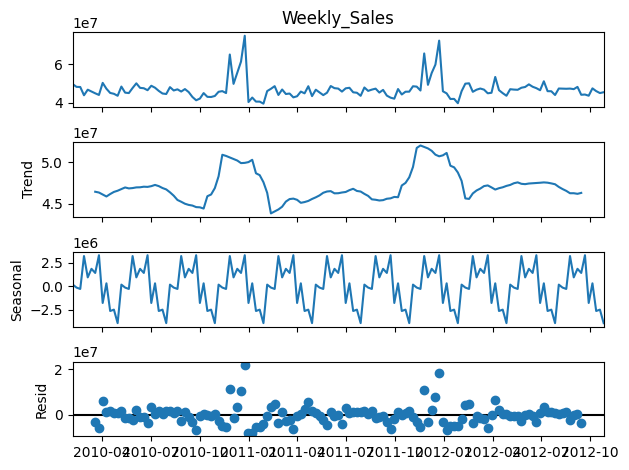

In [419]:
print(sales_decomposition.plot())

Figure(640x480)


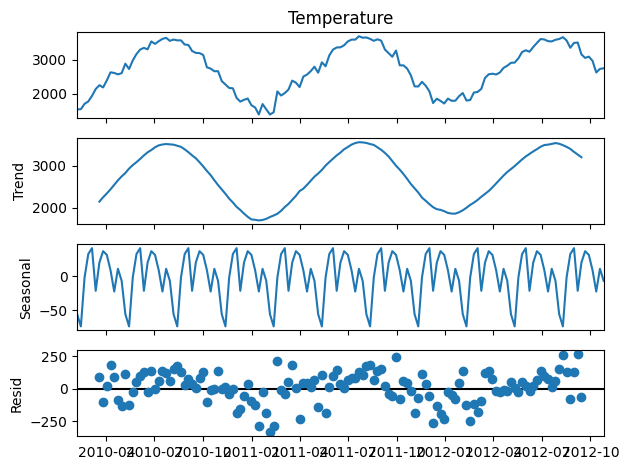

In [420]:
print(Temperature_decomposition.plot())

In [421]:
df_temp_sales = df.groupby(['Date','Temperature'])['Weekly_Sales'].sum().reset_index()

In [422]:
df_temp_sales_correlation =df_temp_sales.corr()

<Axes: >

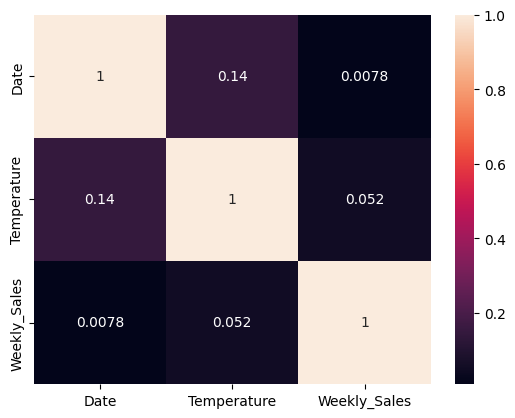

In [423]:
sns.heatmap(df_temp_sales_correlation,annot=True)

In [424]:
df_cpi_sales = df.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()

<Axes: >

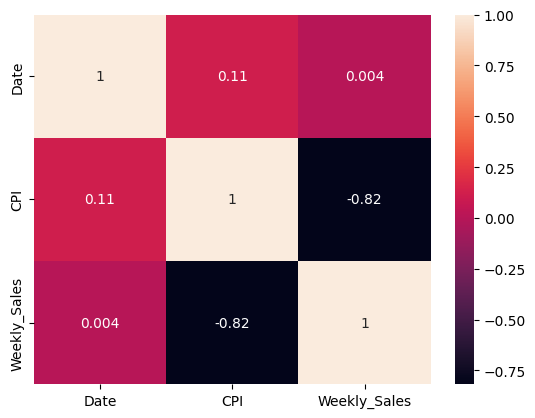

In [425]:
df_cpi_sales_correlation =df_cpi_sales.corr()
sns.heatmap(df_cpi_sales_correlation,annot=True)

<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

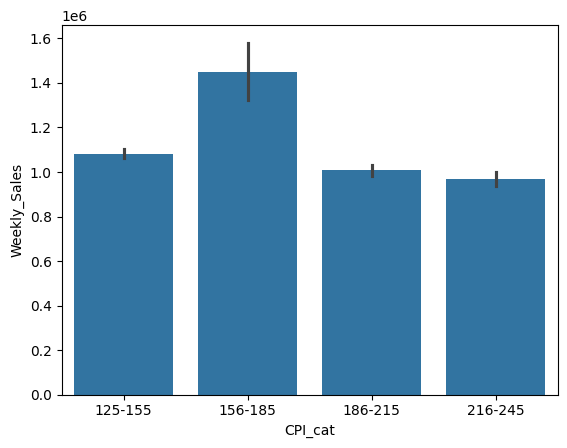

In [426]:
sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'])

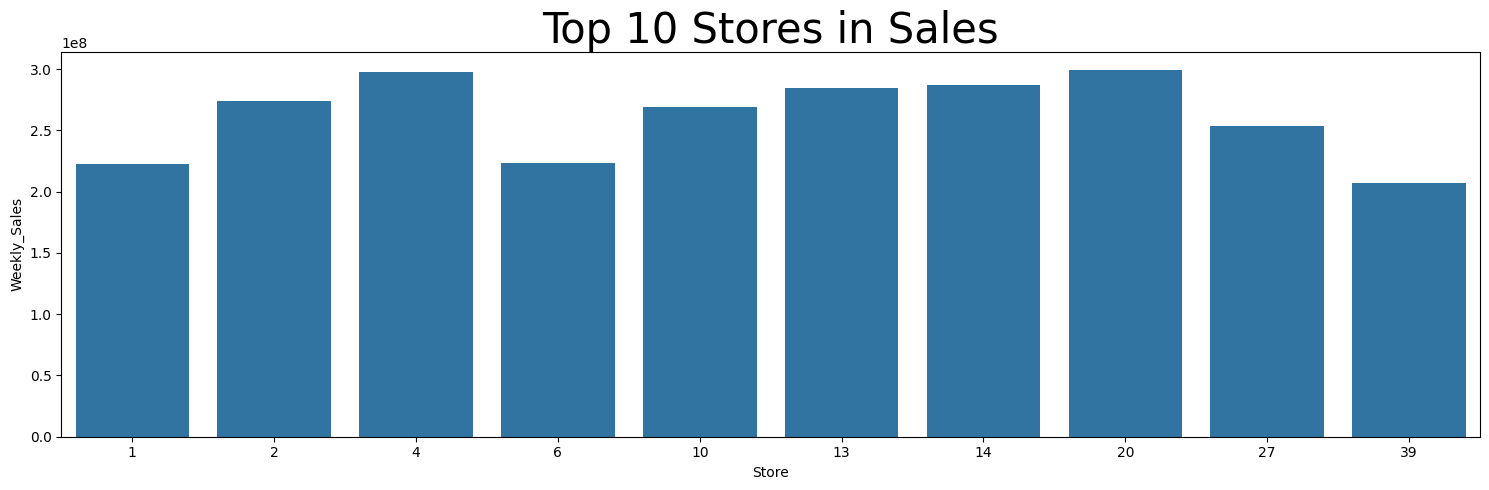

In [427]:
plt.figure(figsize=(15,5)) 
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store) 
plt.title('Top 10 Stores in Sales',fontsize=30)
plt.xlabel('Store') 
plt.ylabel('Weekly_Sales')
plt.tight_layout() 
plt.show()

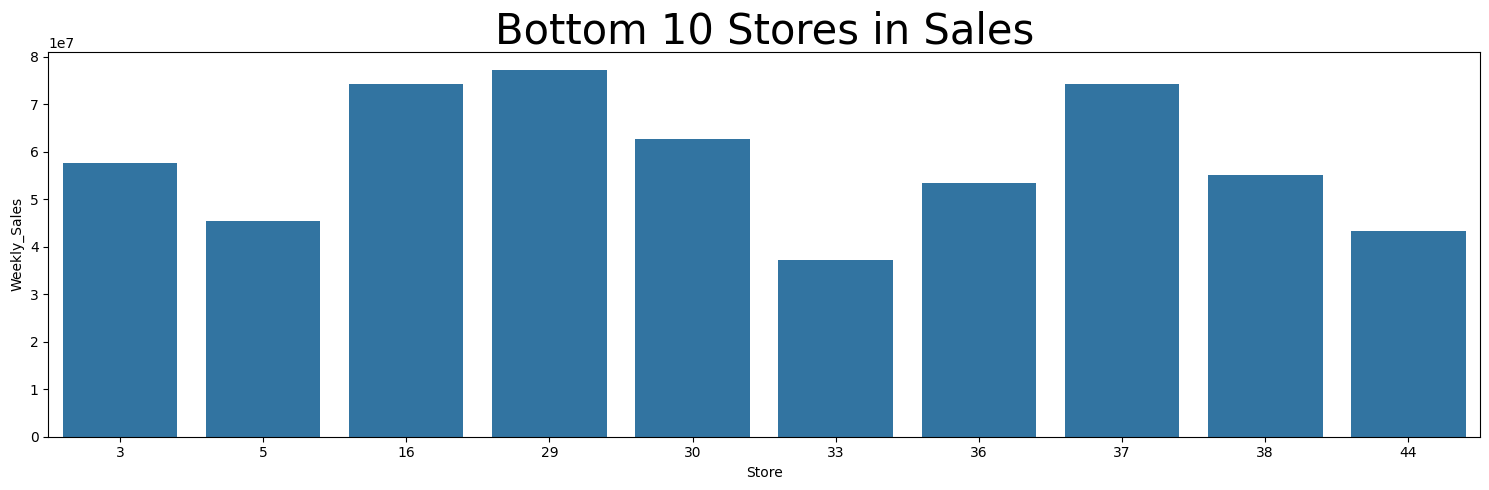

In [428]:
plt.figure(figsize=(15,5)) 
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store) 
plt.title('Bottom 10 Stores in Sales',fontsize=30) 
plt.xlabel('Store')
plt.ylabel('Weekly_Sales') 
plt.tight_layout()
plt.show()

In [429]:
from scipy.stats import ttest_ind 
top_sales = top_10_Sale_Store['Weekly_Sales']
worst_sales = Bottom_10_Sale_Store['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, worst_sales)

In [430]:
if p_value < 0.05:
    print("There is a significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")
else:
    print("There is no significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")

There is a significant difference between top-performing and worst-performing stores.
P-value: 7.079291347377579e-13


In [431]:
mean_difference = top_sales.mean() - worst_sales.mean()
print("Significant Mean difference value between groups:", mean_difference)

Significant Mean difference value between groups: 203807667.66124997


In [432]:
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [433]:
df_stores_sales.set_index('Date',inplace=True)

In [434]:
from statsmodels.tsa.stattools import adfuller 

def adf_test(series, title=''): 

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [435]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.117153e+00
p-value                 9.036826e-08
# lags used             4.000000e+00
# observations          1.380000e+02
critical value (1%)    -3.478648e+00
critical value (5%)    -2.882722e+00
critical value (10%)   -2.578065e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [436]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [437]:
decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

Figure(640x480)


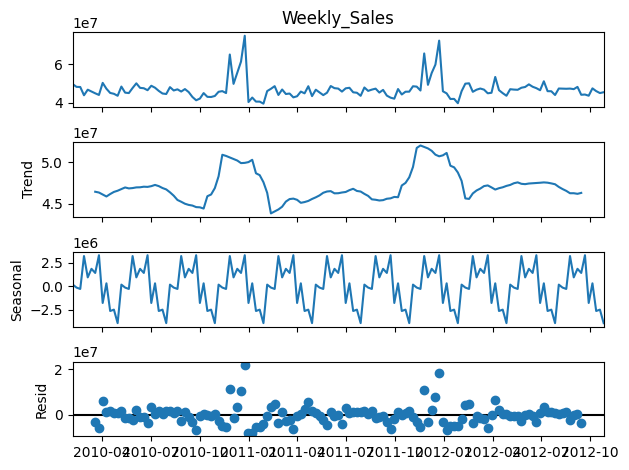

In [438]:
print(decomposition.plot())

In [439]:
mean1=df_stores_sales.rolling(window=10).mean()
std1=df_stores_sales.rolling(window=10).std()

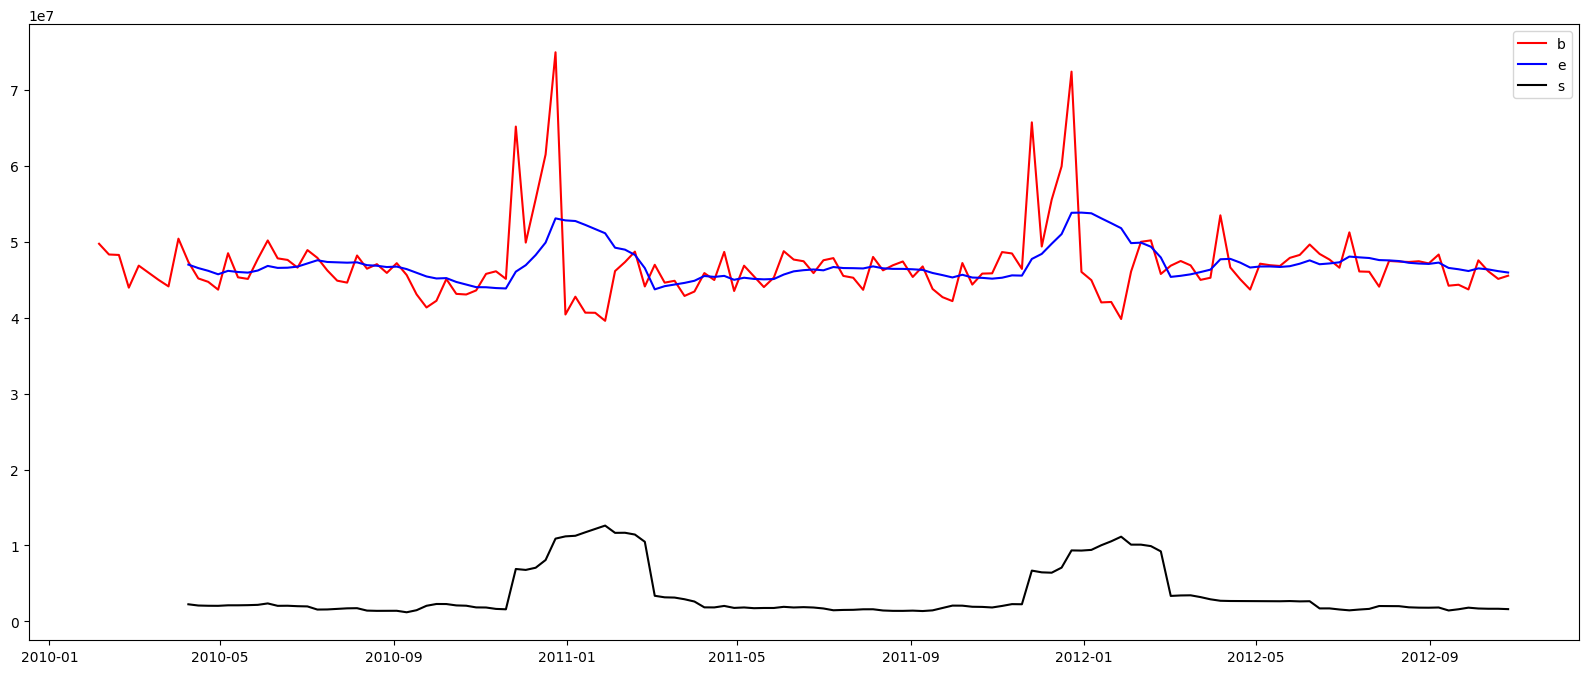

In [440]:
plt.figure(figsize=(20,8))
orig=plt.plot(df_stores_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

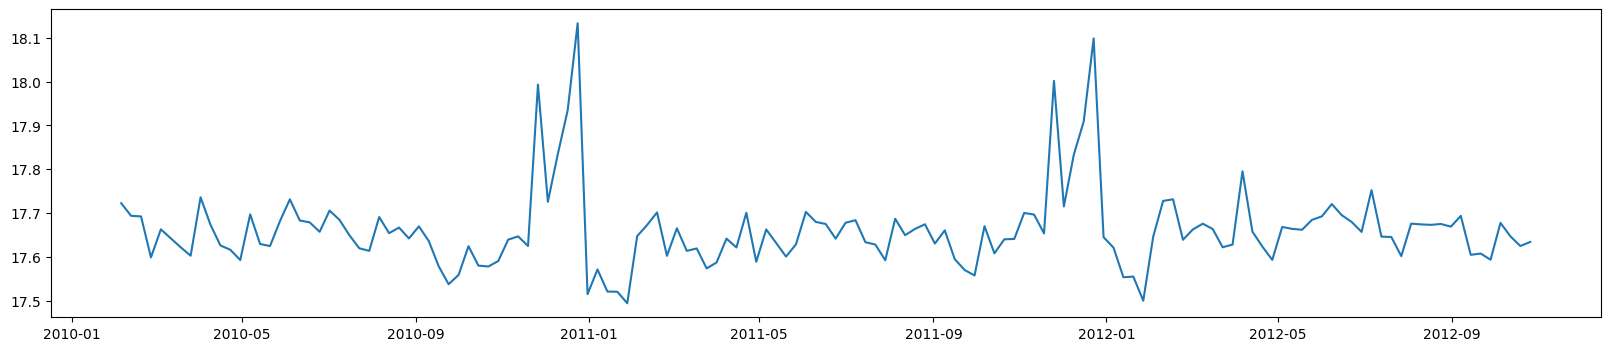

In [441]:
df_log = np.log(df_stores_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

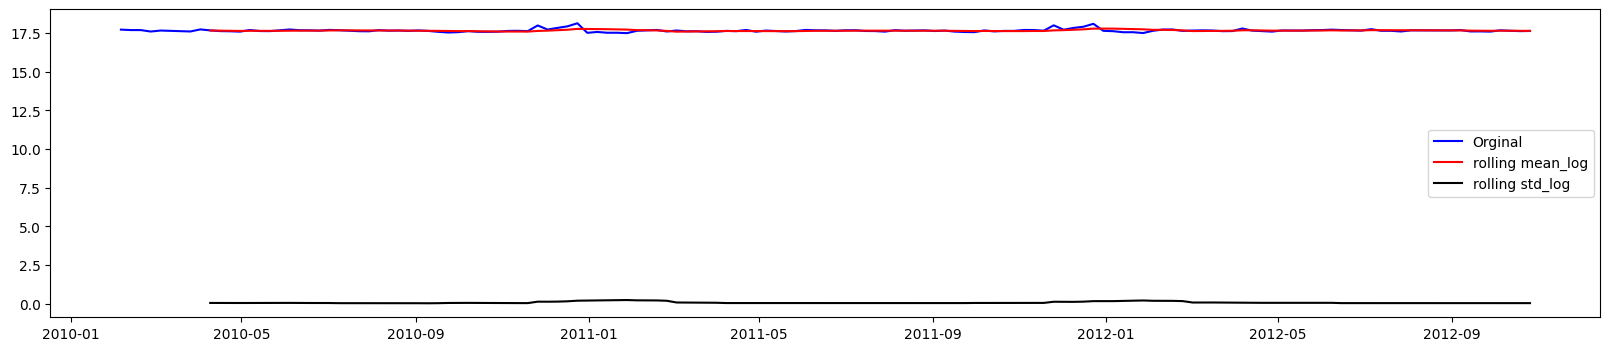

In [442]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [443]:
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-04-02,NaN


In [444]:
df_new.dropna(inplace = True)

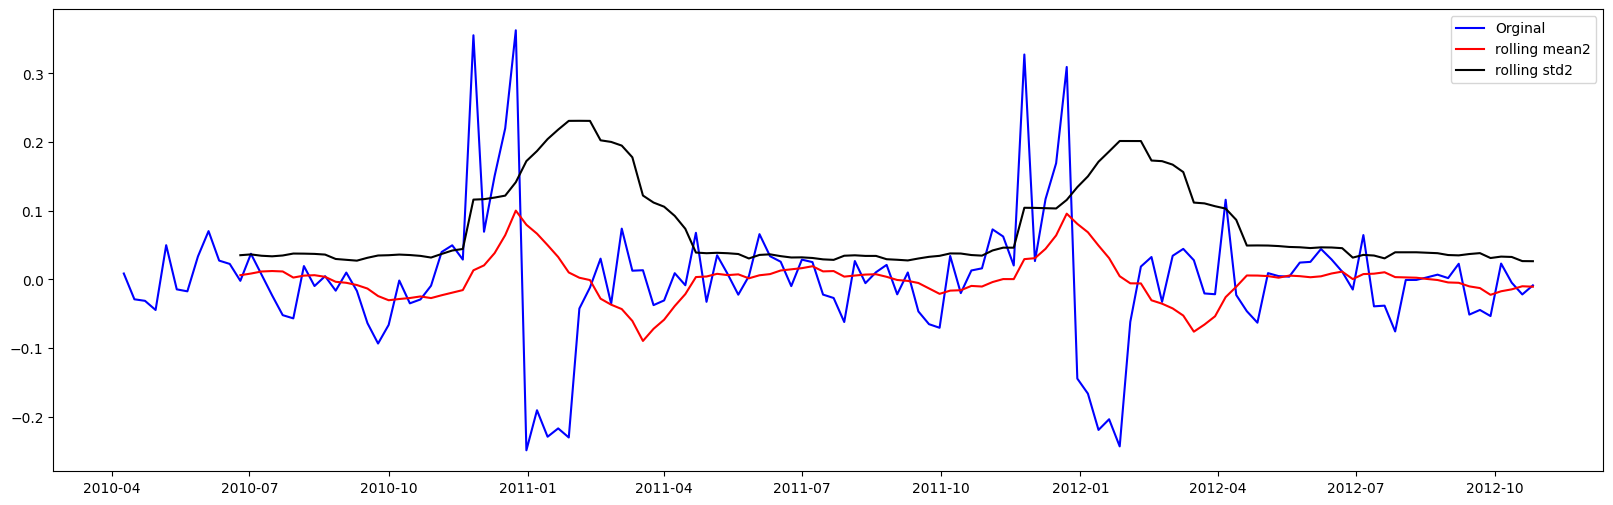

In [445]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [446]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -7.135358e+00
p-value                 3.432339e-10
# lags used             4.000000e+00
# observations          1.290000e+02
critical value (1%)    -3.482088e+00
critical value (5%)    -2.884219e+00
critical value (10%)   -2.578864e+00
Rejects the null hypothesis
Data has no unit root and is stationary


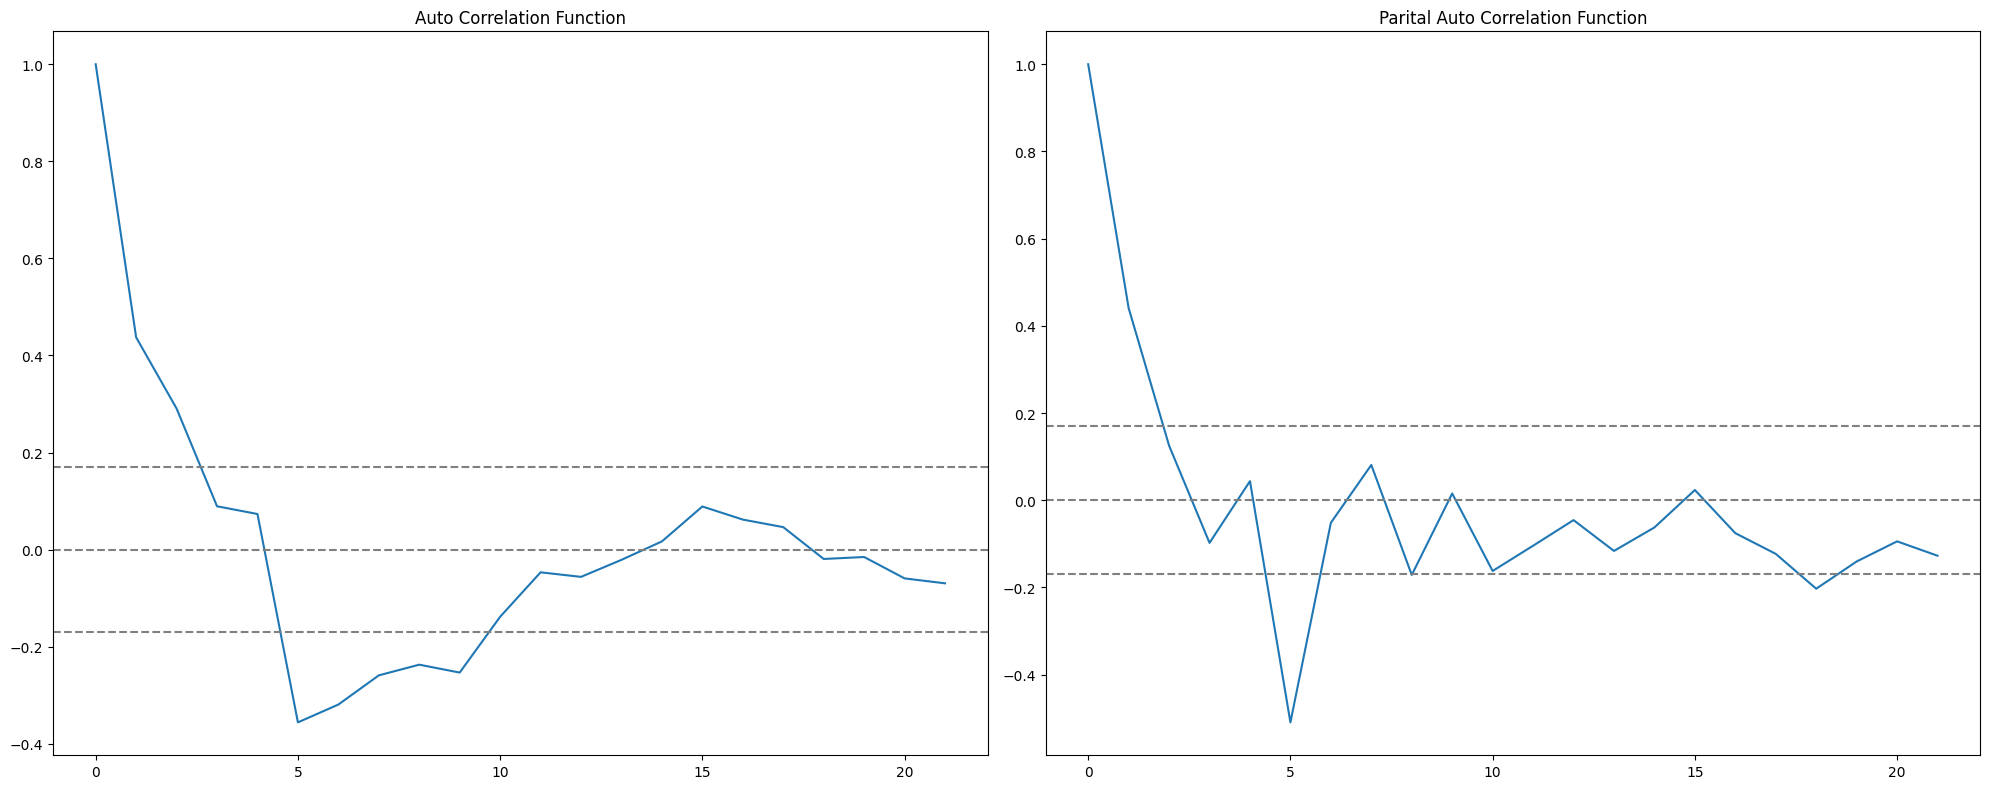

In [447]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [448]:
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2 
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

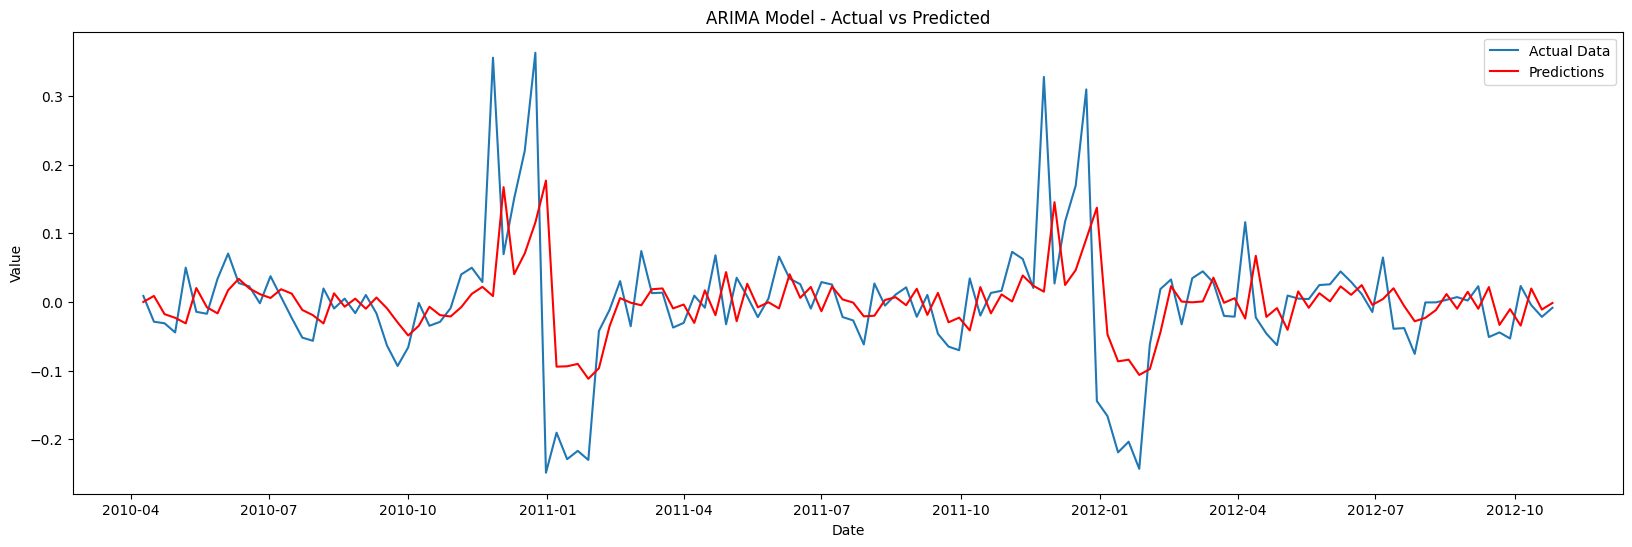

In [449]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [450]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.007247089298954126


In [451]:
rmse=np.sqrt(mse) 
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.08512983788868698


In [452]:
forecast_steps = 12 
forecast = arima_result.forecast(steps=forecast_steps)

In [453]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [454]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [455]:
forecast_df.set_index('Date',inplace=True)

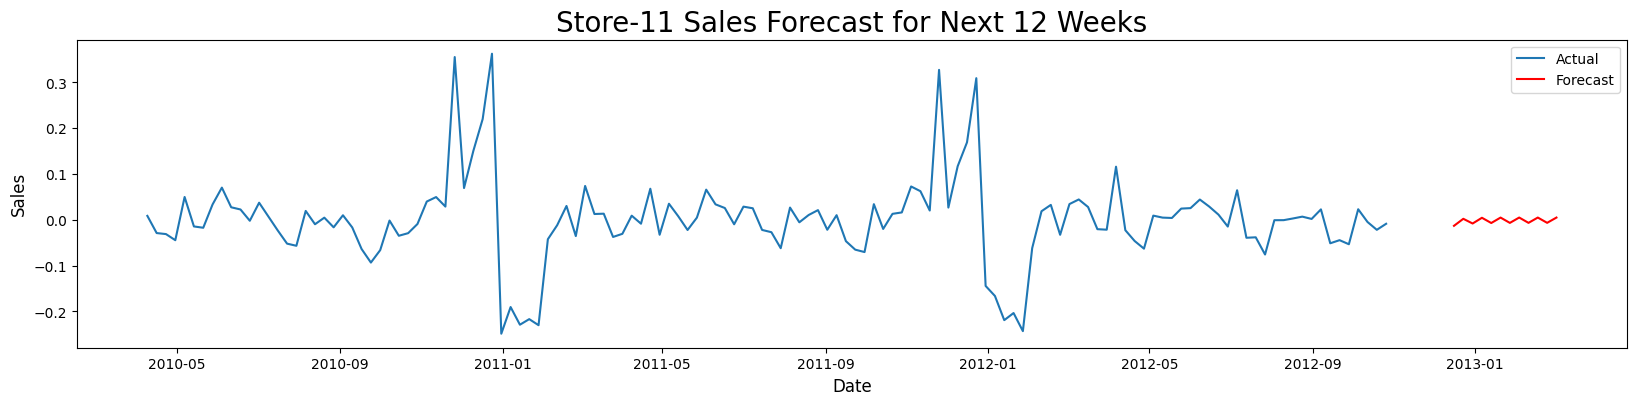

In [456]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-11 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [457]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.08512983788868698


In [458]:
store17_sales=df[df['Store']==17].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [459]:
store17_sales.set_index('Date',inplace=True)

In [460]:
adf_test(store17_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -5.292344
p-value                   0.000006
# lags used               1.000000
# observations          141.000000
critical value (1%)      -3.477601
critical value (5%)      -2.882266
critical value (10%)     -2.577822
Rejects the null hypothesis
Data has no unit root and is stationary


In [461]:
decomposition=seasonal_decompose(store17_sales['Weekly_Sales'],period=13)

Figure(640x480)


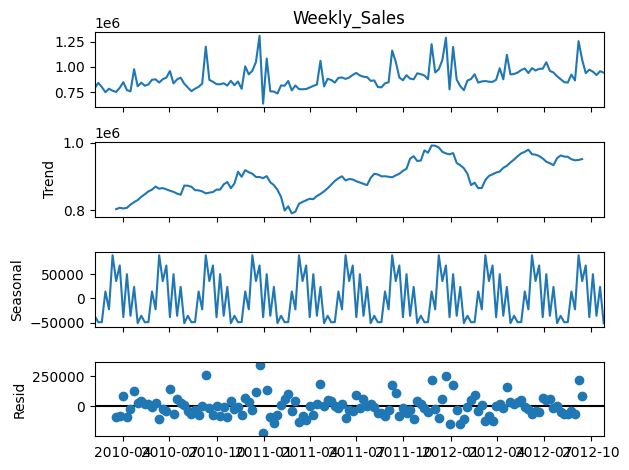

In [462]:
print(decomposition.plot())

In [463]:
mean1=store17_sales.rolling(window=10).mean()
std1=store17_sales.rolling(window=10).std()

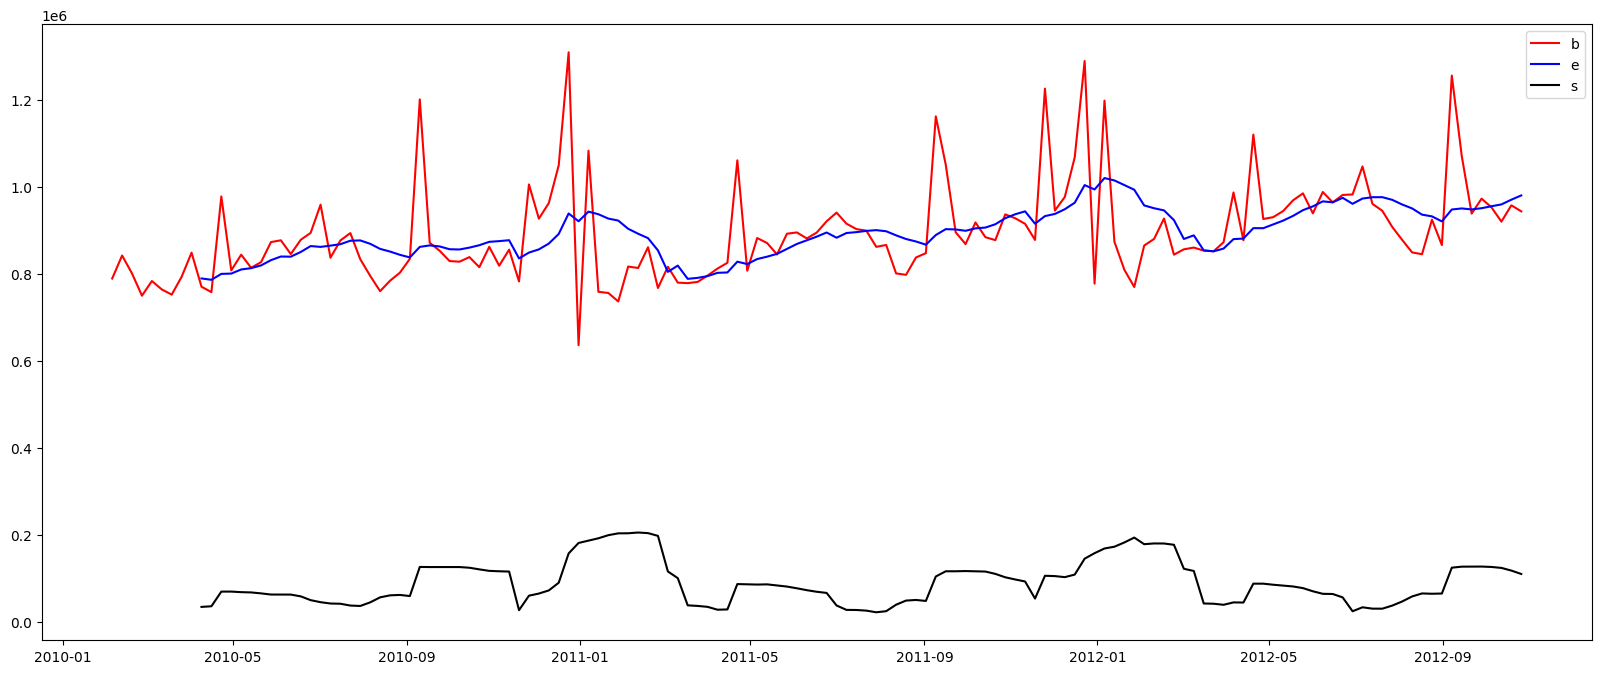

In [464]:
plt.figure(figsize=(20,8))
orig=plt.plot(store17_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

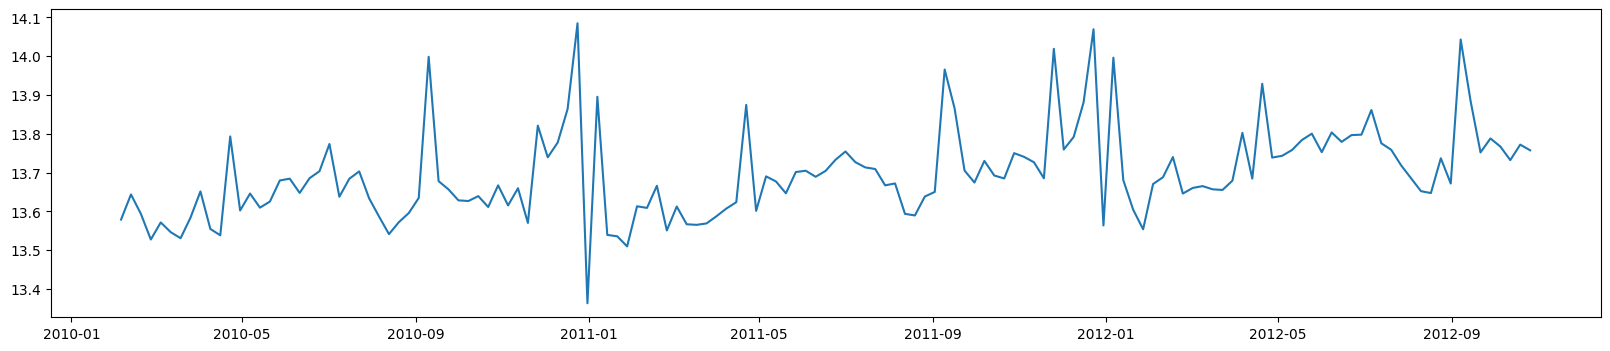

In [465]:
df_log = np.log(store17_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

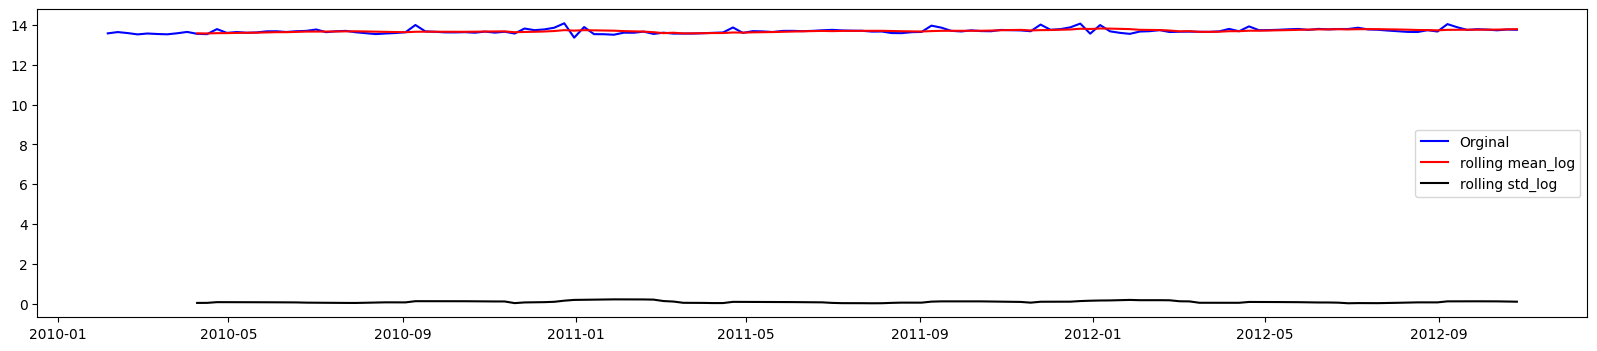

In [466]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [467]:
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-04-02,NaN


In [468]:
df_new.dropna(inplace = True)

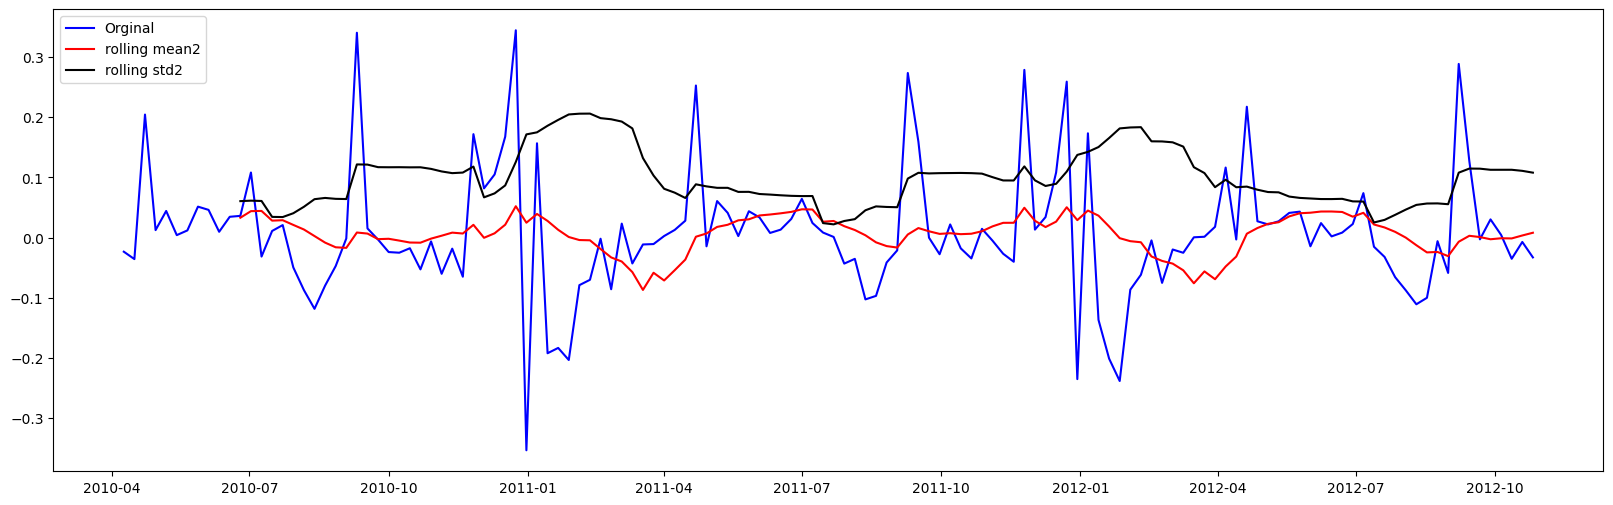

In [469]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [470]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') 

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.371879e+00
p-value                 2.334213e-08
# lags used             4.000000e+00
# observations          1.290000e+02
critical value (1%)    -3.482088e+00
critical value (5%)    -2.884219e+00
critical value (10%)   -2.578864e+00
Rejects the null hypothesis
Data has no unit root and is stationary


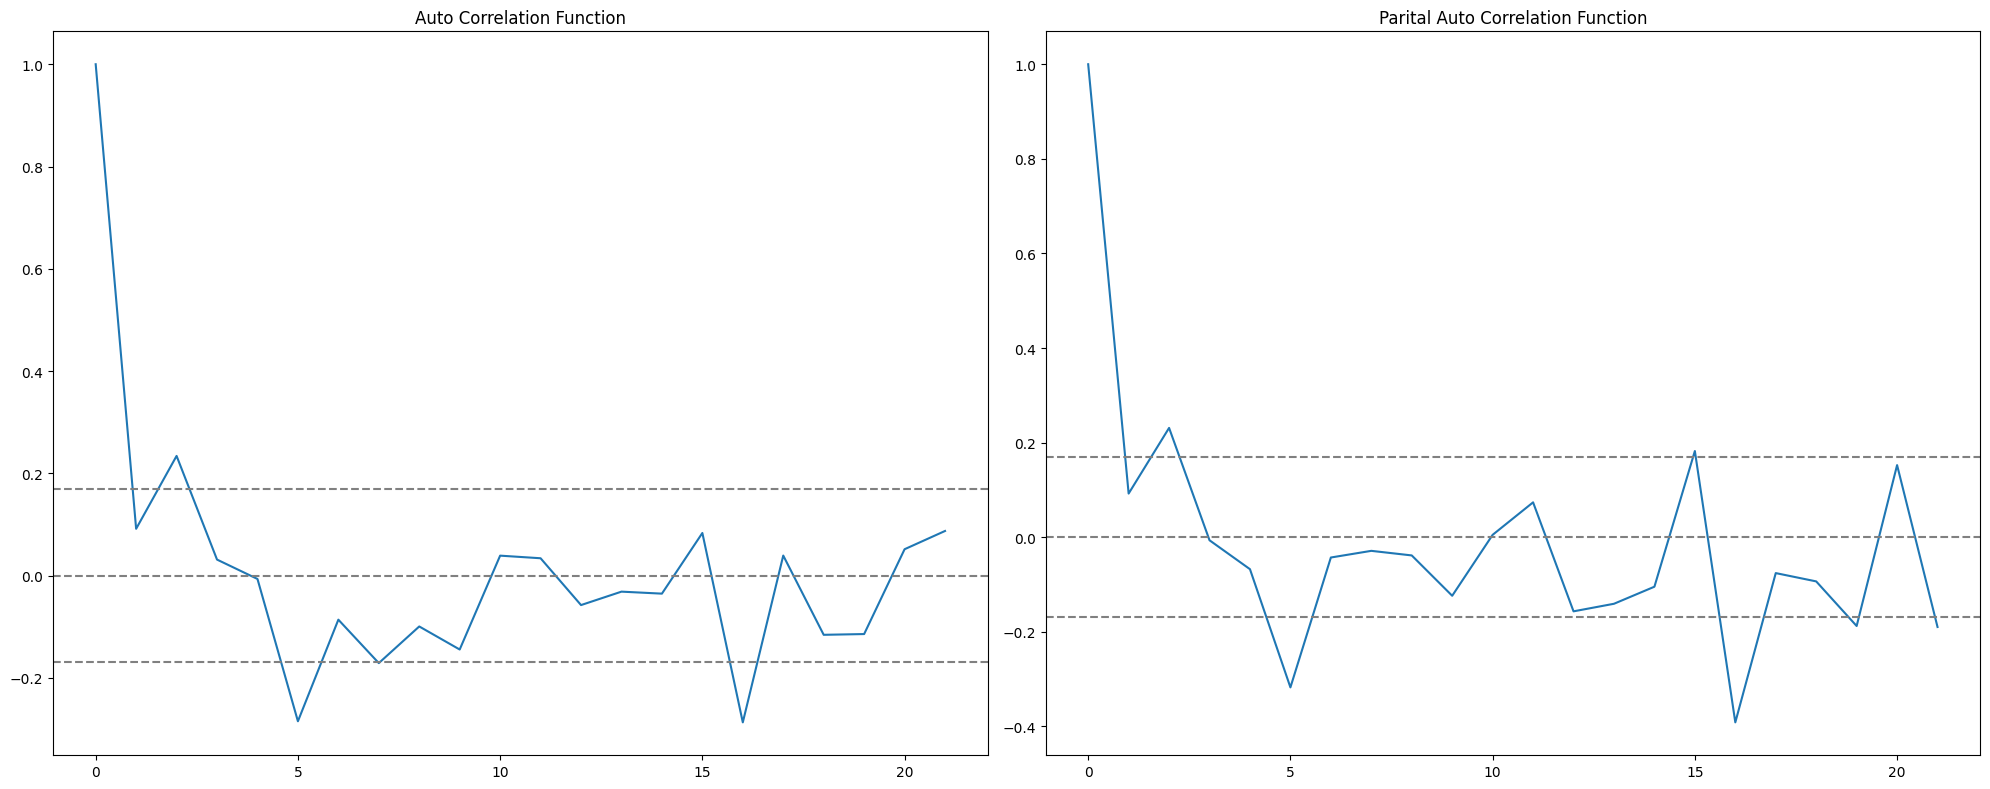

In [471]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [472]:
p, d, q = 3, 1, 3 
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

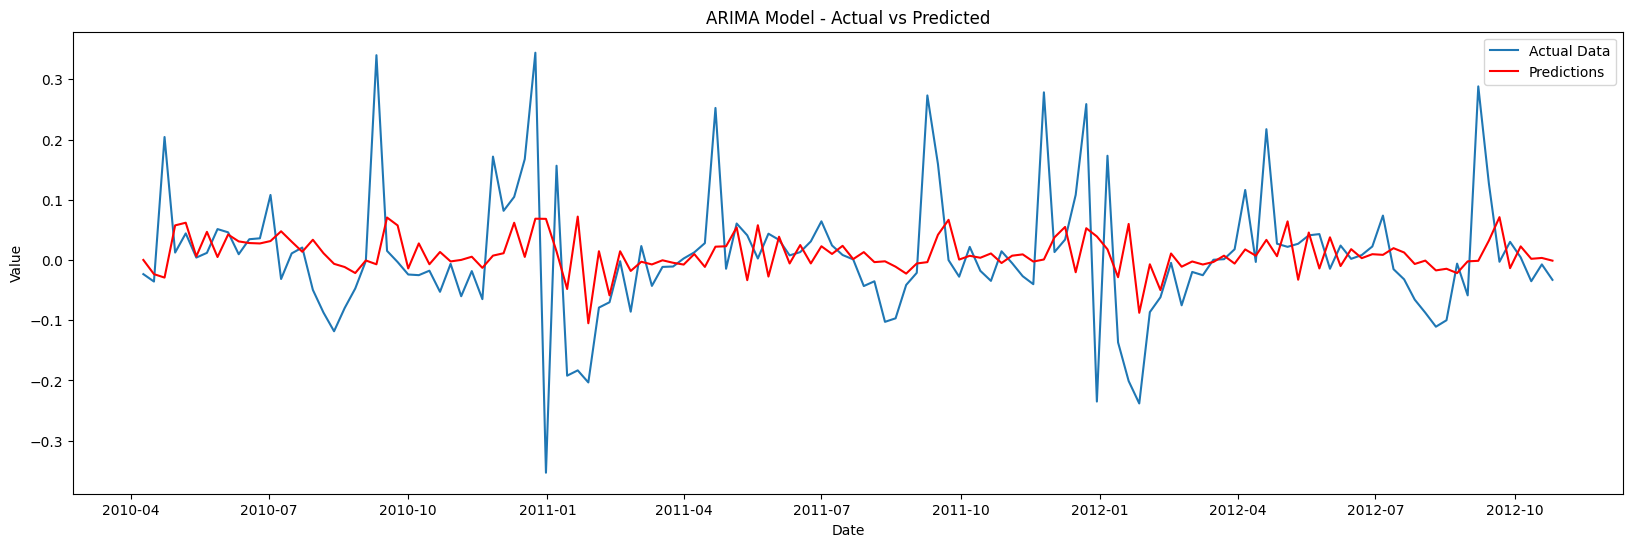

In [473]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [474]:
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.010762356707577744


In [475]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.10374177898791664


In [476]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

In [477]:
end_date_actual_data = '2012-12-10' 

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [478]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [479]:
forecast_df.set_index('Date',inplace=True)

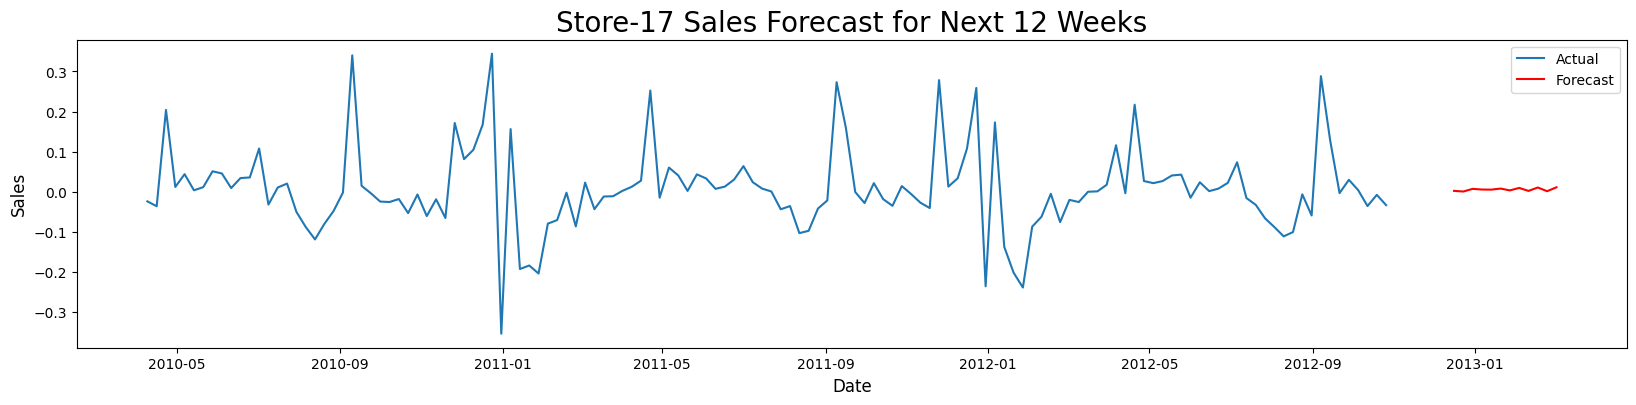

In [480]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-17 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [481]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.10374177898791664


In [482]:
store33_sales=df[df['Store']==33].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [483]:
store33_sales.set_index('Date',inplace=True)

In [484]:
adf_test(store33_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.137873
p-value                   0.000838
# lags used              14.000000
# observations          128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
Rejects the null hypothesis
Data has no unit root and is stationary


In [485]:
decomposition=seasonal_decompose(store33_sales['Weekly_Sales'],period=13)

Figure(640x480)


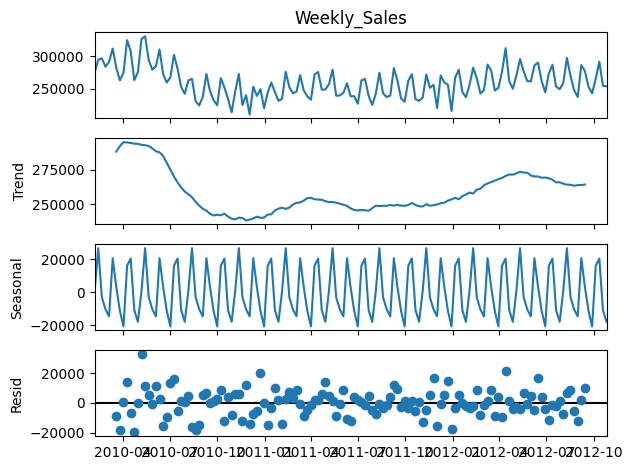

In [486]:
print(decomposition.plot())

In [487]:
mean1=store33_sales.rolling(window=10).mean()
std1=store33_sales.rolling(window=10).std()

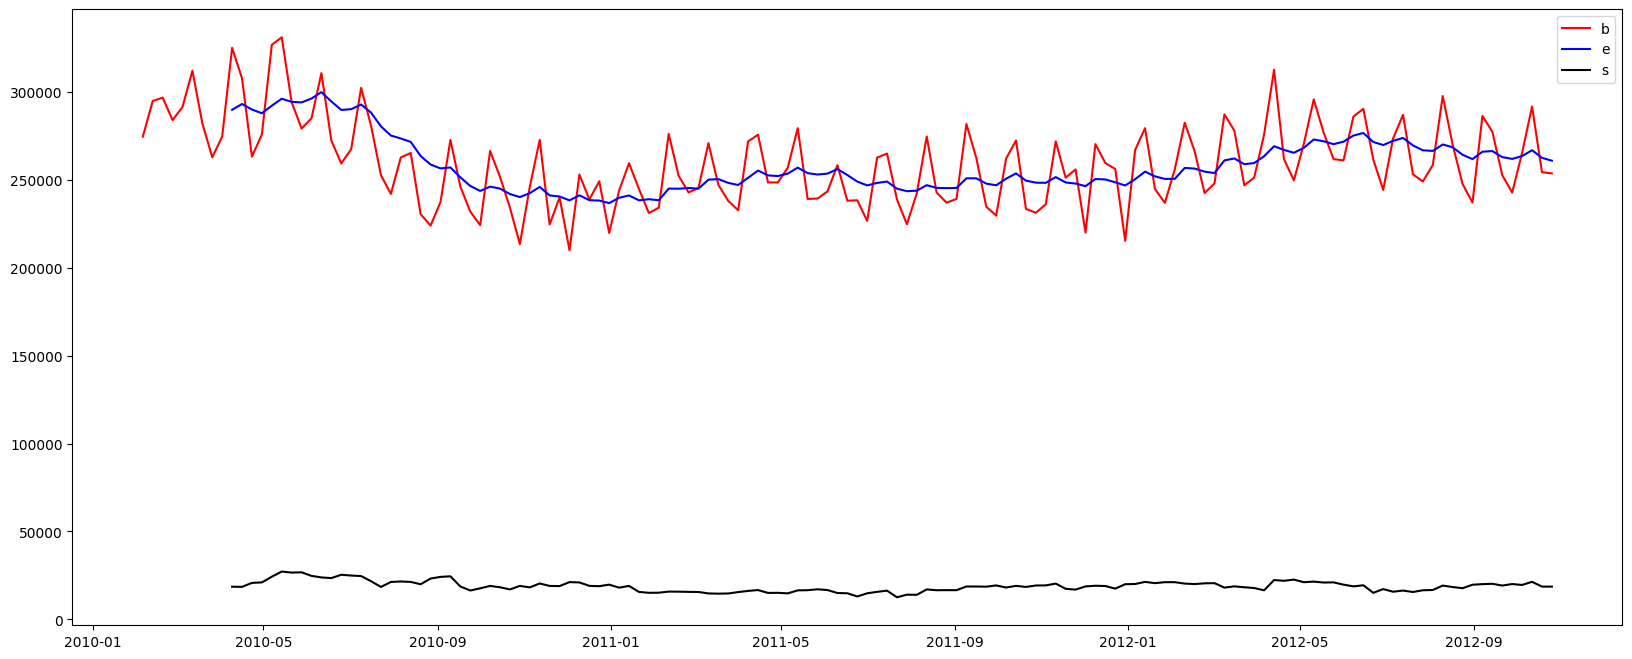

In [488]:
plt.figure(figsize=(20,8))
orig=plt.plot(store33_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

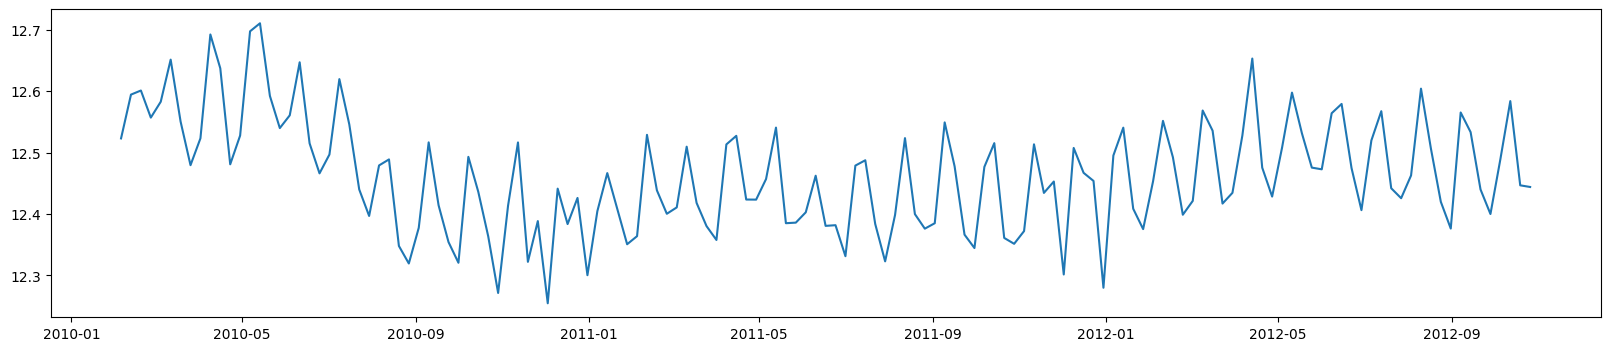

In [489]:
df_log = np.log(store33_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

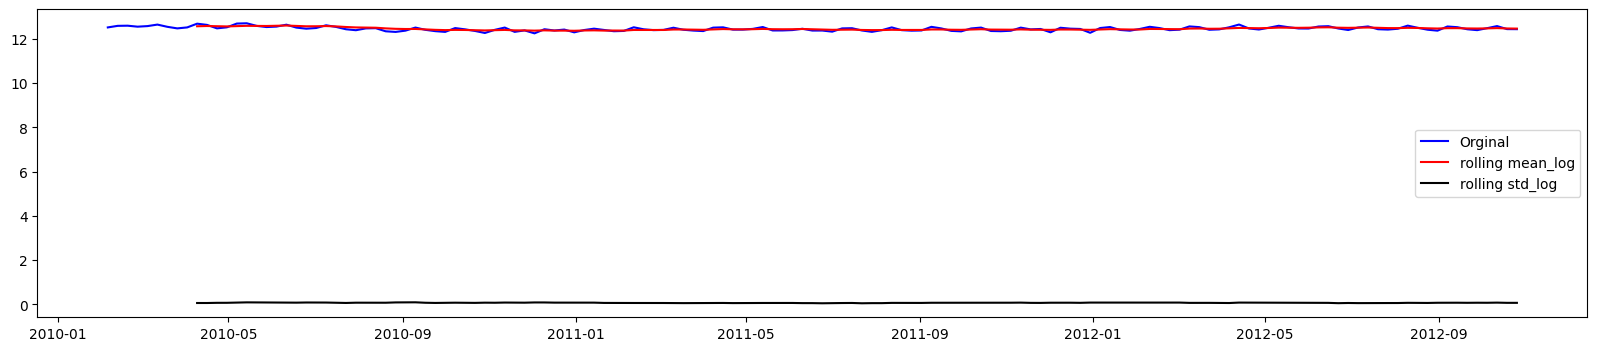

In [490]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [491]:
df_new = df_log - mean_log
df_new.head(20)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-04-02,NaN


In [492]:
df_new.dropna(inplace = True)

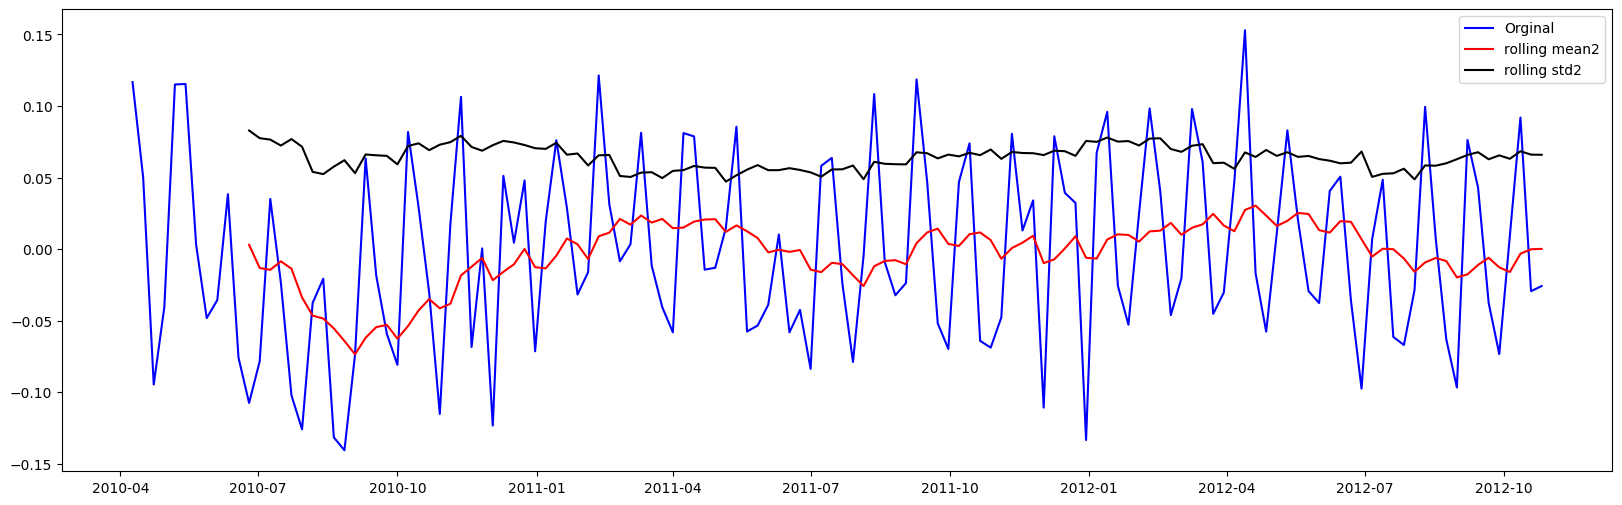

In [493]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [494]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -2.266133
p-value                   0.183123
# lags used               8.000000
# observations          125.000000
critical value (1%)      -3.483779
critical value (5%)      -2.884954
critical value (10%)     -2.579257
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


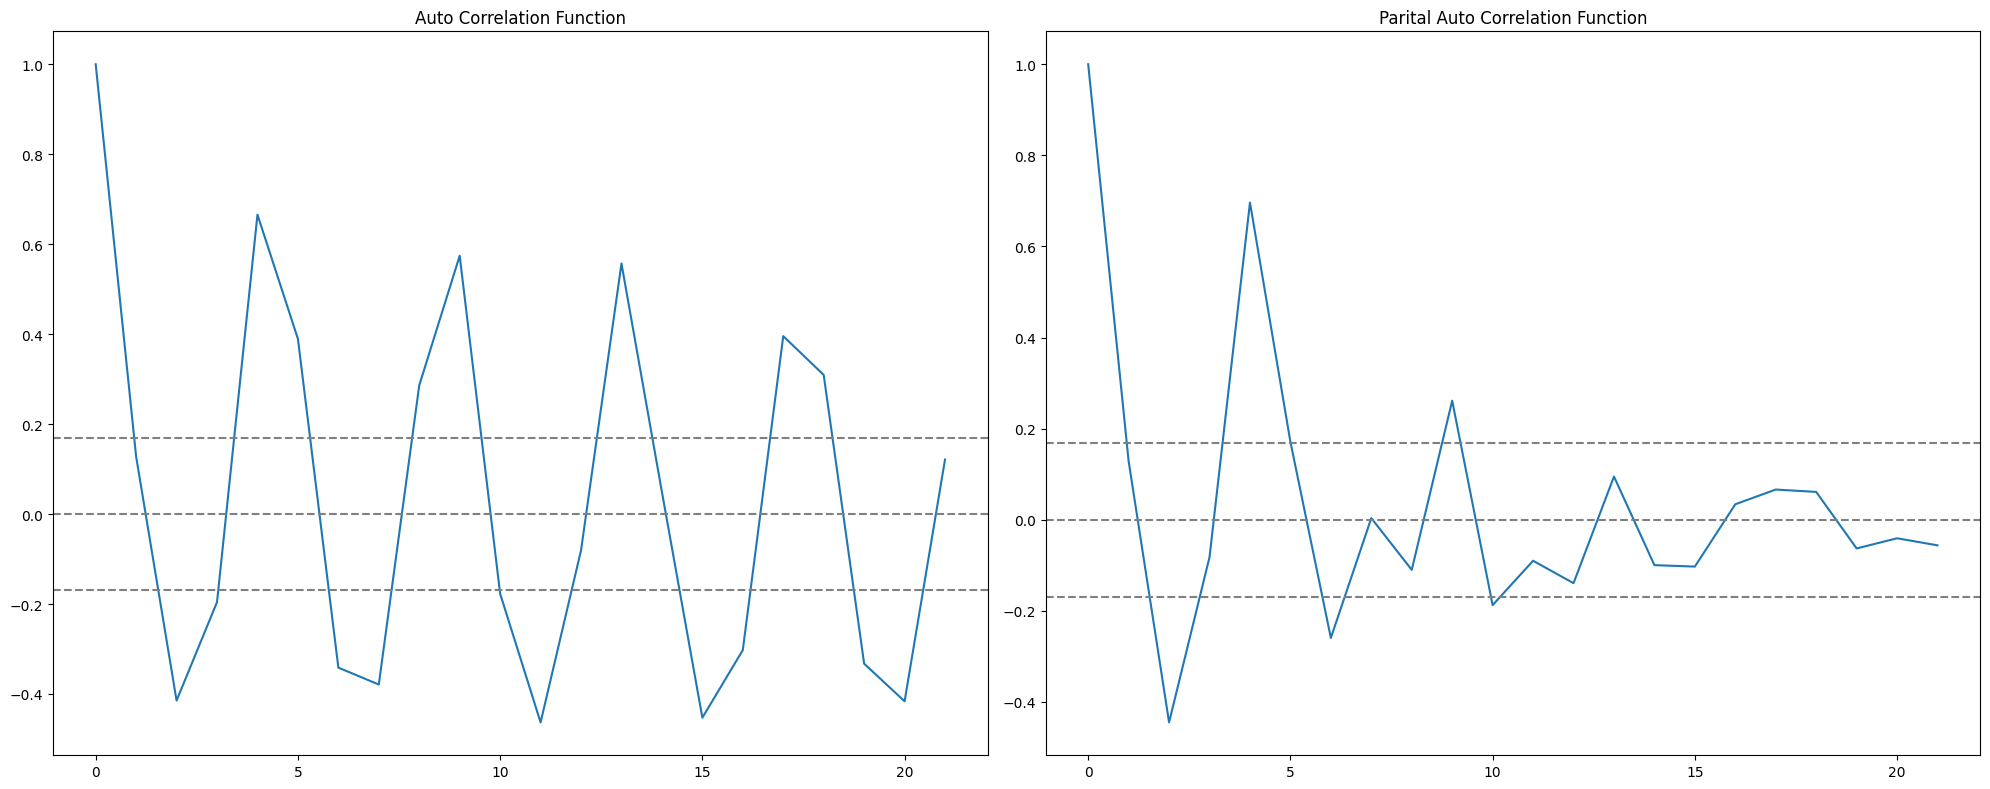

In [495]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [496]:
p, d, q = 2, 1, 2
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

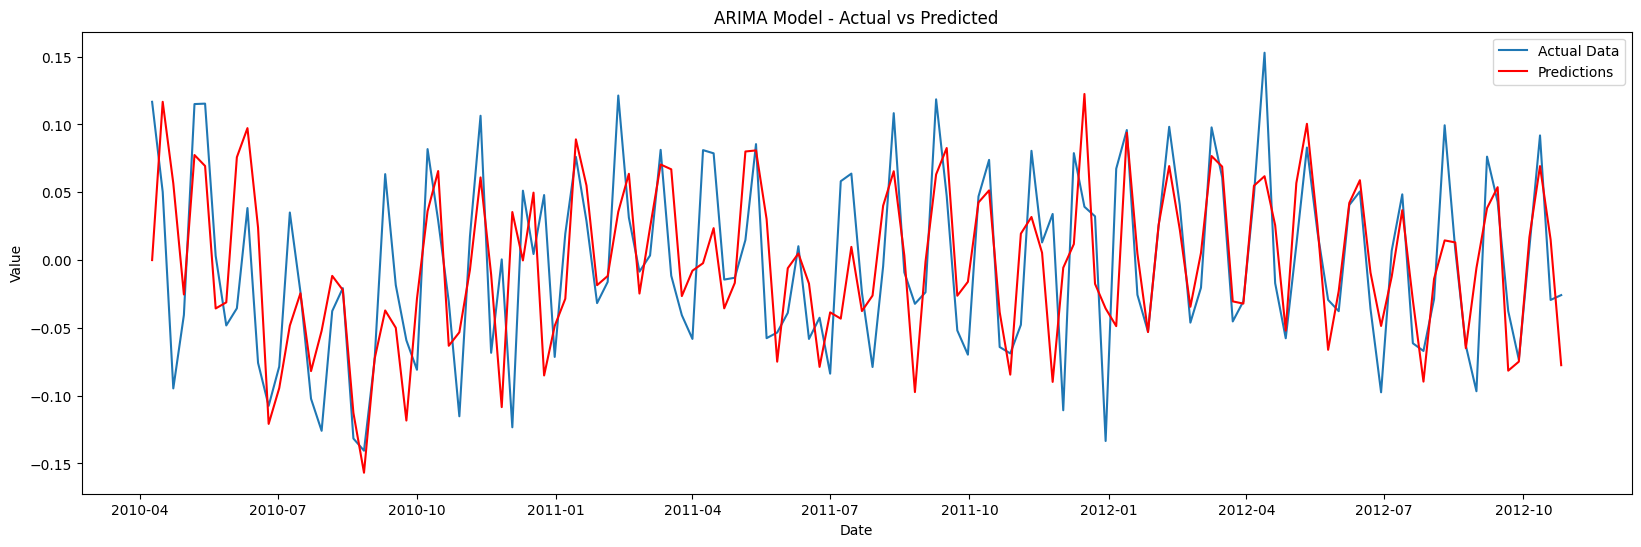

In [497]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [498]:
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.0028420832995375276


In [499]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.05331119300426063


In [500]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

In [501]:
end_date_actual_data = '2012-12-10' 

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [502]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [503]:
forecast_df.set_index('Date',inplace=True)

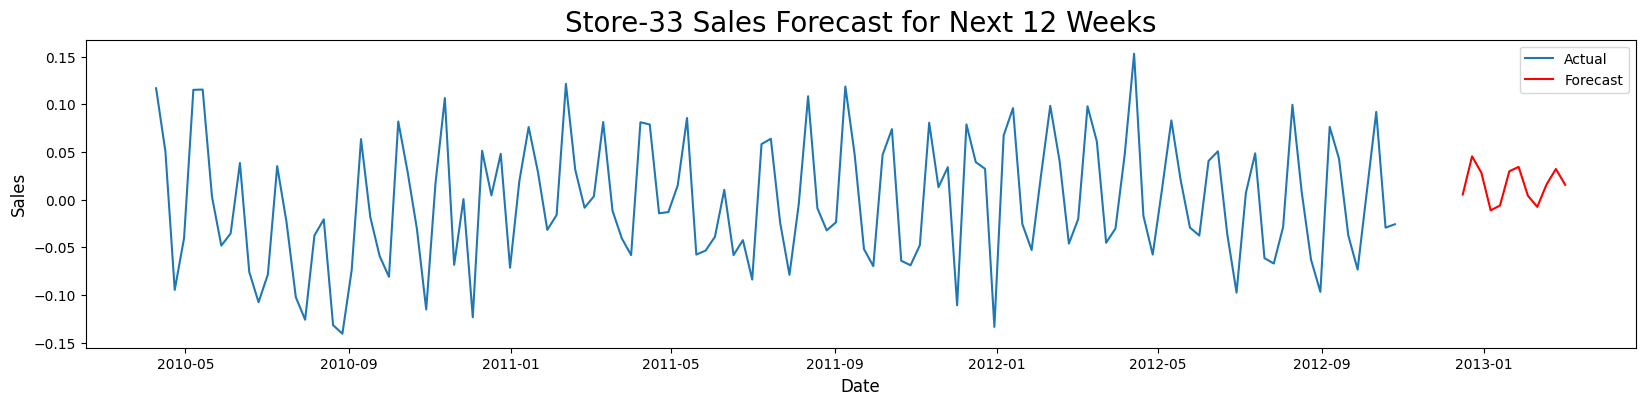

In [504]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-33 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [505]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.05331119300426063


In [506]:
seasonal_decompose(df_stores_sales['Weekly_Sales'], period=13)

In [507]:
adf_test(df_stores_sales['Weekly_Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.117153e+00
p-value                 9.036826e-08
# lags used             4.000000e+00
# observations          1.380000e+02
critical value (1%)    -3.478648e+00
critical value (5%)    -2.882722e+00
critical value (10%)   -2.578065e+00
Rejects the null hypothesis
Data has no unit root and is stationary


                                      SARIMAX Results                                       
Dep. Variable:                         Weekly_Sales   No. Observations:                  134
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 13)   Log Likelihood                 206.480
Date:                              Thu, 24 Apr 2025   AIC                           -398.961
Time:                                      10:48:44   BIC                           -379.448
Sample:                                  04-09-2010   HQIC                          -391.037
                                       - 10-26-2012                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7071      0.380     -1.863      0.062      -1.451       0.037
ar.L2          0.13

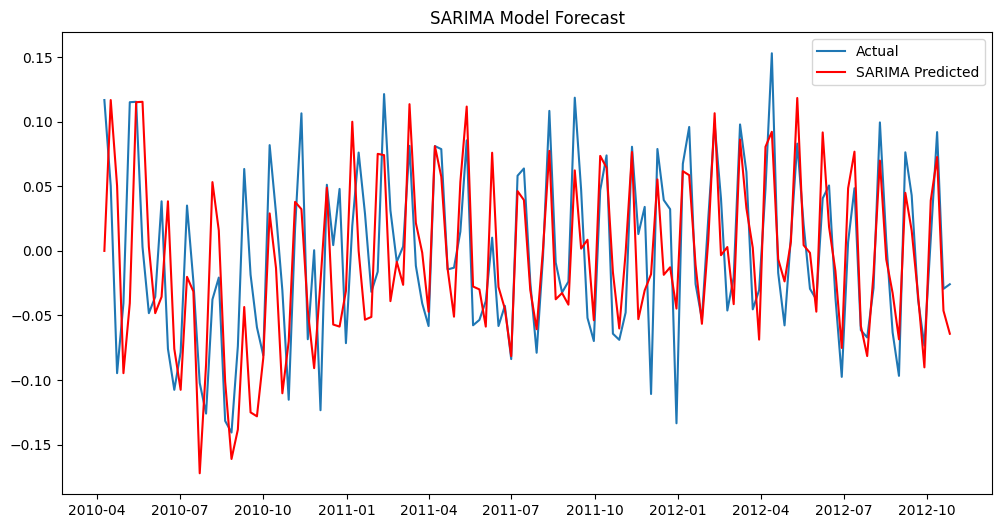

In [508]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df_new, 
                       order=(2, 1, 2), 
                       seasonal_order=(1, 1, 1, 13))
sarima_result = sarima_model.fit()

print(sarima_result.summary())

sarima_predictions = sarima_result.predict(start=0, end=len(df_new)-1)

plt.figure(figsize=(12,6))
plt.plot(df_new, label='Actual')
plt.plot(sarima_predictions, label='SARIMA Predicted', color='red')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()


In [509]:
mse=mean_squared_error(df_new,sarima_predictions)
mse

0.002557634694039871

In [510]:
rmse = np.sqrt(mse)
rmse

0.05057306292919059

In [511]:
from sklearn.metrics import r2_score
r2 = r2_score(df_new, sarima_predictions)
r2

0.41489989429716223

In [512]:

r2a = r2_score(df_new, predictions)
r2a

0.3498276971098382

In [513]:
# //ARIMA PERFORMED BETTER THAN SARIMA WHEN CHECKING R2 SCORE

In [514]:
# import joblib

# joblib.dump(arima_result, 'arima_model.pkl')
# print("Model saved as arima_model.pkl")


In [515]:
import pandas as pd
import numpy as np
import joblib

arima_result = joblib.load("arima_model.pkl")

forecast_steps = 20
forecast = arima_result.forecast(steps=forecast_steps)

mean_log_valid = mean_log.dropna()

last_rolling_mean_val = mean_log_valid.iloc[-1]
mean_log_forecast = np.full(shape=forecast_steps, fill_value=last_rolling_mean_val)

log_forecast = forecast.values.flatten() + mean_log_forecast 

original_scale_forecast = np.exp(log_forecast)

forecast_dates = pd.date_range(start=df_log.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W-FRI')
forecast_df = pd.DataFrame({
    "Date": forecast_dates,
    "Forecasted_Sales": original_scale_forecast
})

print(forecast_df)


         Date  Forecasted_Sales
0  2012-11-02     261753.555285
1  2012-11-09     272453.722837
2  2012-11-16     267816.097077
3  2012-11-23     257459.109415
4  2012-11-30     258773.781954
5  2012-12-07     268217.730675
6  2012-12-14     269449.134121
7  2012-12-21     261419.280913
8  2012-12-28     258392.207893
9  2013-01-04     264555.436070
10 2013-01-11     268863.544633
11 2013-01-18     264442.498350
12 2013-01-25     259637.415285
13 2013-02-01     262221.131274
14 2013-02-08     267135.298681
15 2013-02-15     266070.920801
16 2013-02-22     261513.474788
17 2013-03-01     261288.504765
18 2013-03-08     265216.753990
19 2013-03-15     266417.993796


In [516]:
# TRYING LSTM

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0507 - val_loss: 0.0045
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0287 - val_loss: 0.0032
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0230 - val_loss: 0.0027
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0215 - val_loss: 0.0019
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0271 - val_loss: 0.0018
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0212 - val_loss: 0.0018
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0251 - val_loss: 0.0019
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0198 - val_loss: 0.0020
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0157 - val_loss: 0.0018
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0229 - val_loss: 0.0019
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0196 - val_loss: 0.0019
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0170 - val_loss: 0.0018
E

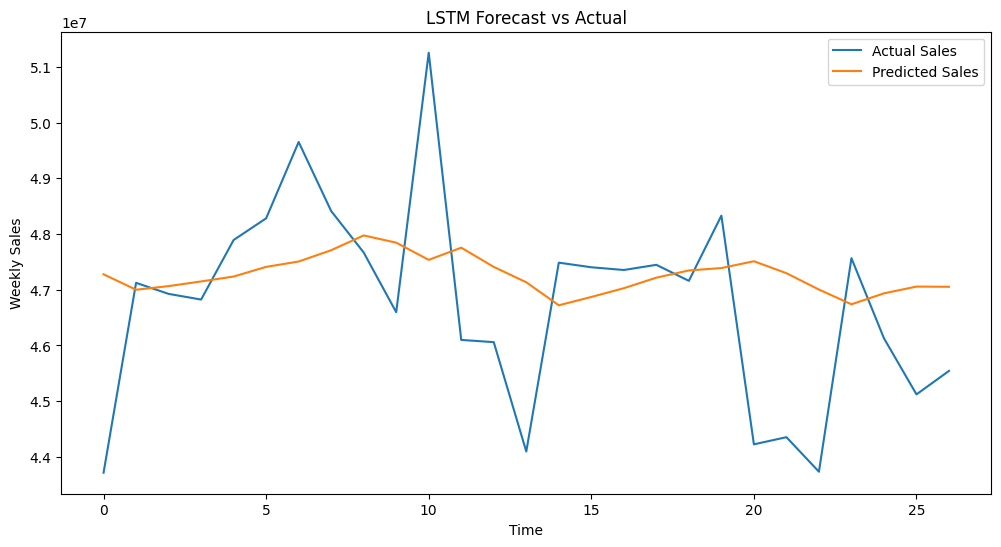

R² Score: -1224915385716056576.0000
Accuracy (100 - MAPE): -4183808929.11%


In [517]:
df = pd.read_csv("Walmart DataSet.csv")

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

sales_data = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

sales_data = sales_data.sort_values('Date')

scaler = MinMaxScaler()
scaled_sales = scaler.fit_transform(sales_data['Weekly_Sales'].values.reshape(-1, 1))

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

sequence_length = 10
X, y = create_sequences(scaled_sales, sequence_length)

X = X.reshape((X.shape[0], X.shape[1], 1))


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Sales')
plt.plot(predicted, label='Predicted Sales')
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

from sklearn.metrics import r2_score, mean_absolute_error

actual = y_test.reshape(-1, 1)
actual = scaler.inverse_transform(actual)
predicted = scaler.inverse_transform(predicted)

r2 = r2_score(actual, predicted)
print(f"R² Score: {r2:.4f}")

mape = np.mean(np.abs((actual - predicted) / actual)) * 100
accuracy = 100 - mape
print(f"Accuracy (100 - MAPE): {accuracy:.2f}%")



In [518]:
from sklearn.ensemble import RandomForestRegressor

In [519]:
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag','Store']
target = 'Weekly_Sales'

In [520]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Mean Squared Error: 21750203695.738834
R2 Score: 0.9324851916331924
Accuracy (High/Low Sales): 0.9541569541569541
Precision: 0.9457013574660633
Recall: 0.9646153846153847


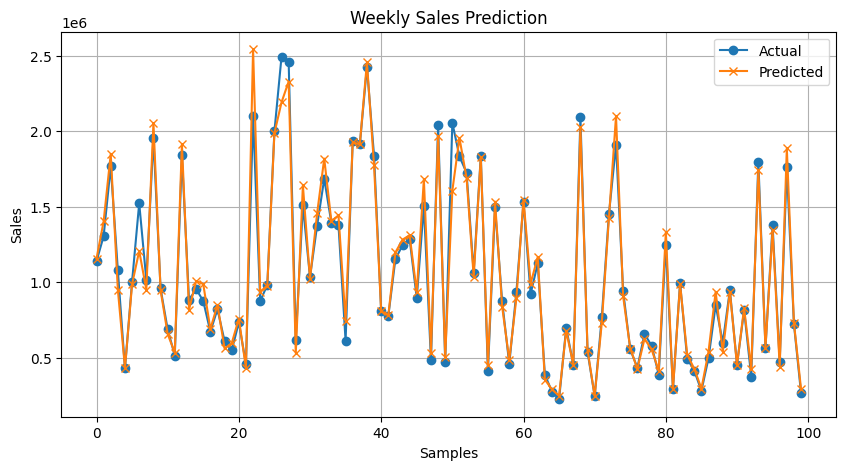

In [521]:
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

threshold = y_train.median()
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred >= threshold).astype(int)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)

print("Accuracy (High/Low Sales):", accuracy)
print("Precision:", precision)
print("Recall:", recall)

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Weekly Sales Prediction')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [522]:
# import joblib

# joblib.dump(model, 'holiday_sales3_model.pkl')
# print("Model saved as 'holiday_sales_model.pkl'")


In [523]:
import pandas as pd
import joblib
from datetime import timedelta

model = joblib.load("holiday_sales3_model.pkl")

temperature = float(input("Enter Temperature: "))
fuel_price = float(input("Enter Fuel Price: "))
cpi = float(input("Enter CPI: "))
unemployment = float(input("Enter Unemployment Rate: "))
store = float(input("Enter Store: "))
forecast_weeks = int(input("Enter number of weeks to forecast: "))
start_date_str = input("Enter start date (YYYY-MM-DD): ")
start_date = pd.to_datetime(start_date_str)

future_data = []
for i in range(forecast_weeks):
    date = start_date + timedelta(weeks=i)
    year = date.year
    month = date.month
    week = date.isocalendar()[1]
    holiday_flag = 1 if week in [6, 47, 52, 14] else 0 

    future_data.append({
        'Temperature': temperature,
        'Fuel_Price': fuel_price,
        'CPI': cpi,
        'Unemployment': unemployment,
        'Holiday_Flag': holiday_flag,
        'Month': month,
        'Store': store,
        'Week': week,
        'Year': year,
        'Date': date
    })

future_df = pd.DataFrame(future_data)

features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag','Store']
X_future = future_df[features]

future_df['Forecasted_Sales'] = model.predict(X_future)

print("\nForecasted Weekly Sales:\n")
print(future_df[['Date', 'Forecasted_Sales']])


Enter Temperature:  40
Enter Fuel Price:  100
Enter CPI:  220
Enter Unemployment Rate:  7
Enter Store:  1
Enter number of weeks to forecast:  5
Enter start date (YYYY-MM-DD):  2013-02-05



Forecasted Weekly Sales:

        Date  Forecasted_Sales
0 2013-02-05      1.723708e+06
1 2013-02-12      1.719696e+06
2 2013-02-19      1.719696e+06
3 2013-02-26      1.719696e+06
4 2013-03-05      1.719696e+06


In [524]:
# SO WE FIND OUT THAT RANDOM FOREST WORKED BEST